# Measuring Pineapple Juice Impact on Quantitative MRI Liver Metrics



In [93]:
# Get Current directory, if not change to the main directory
import os
if os.getcwd() != '/Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice':
    os.chdir('/Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice')
print('All required data for this project can be found at:', os.getcwd())

# How this report was generated
print('This report was generated with `jupyter nbconvert --to pdf --no-input VendorSpecificPlots.ipynb` command.')

#Adding time stamp for periodic output
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')
print('Late Update:', today)

Current directory is: /Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice
This report was generated with `jupyter nbconvert --to pdf --no-input VendorSpecificPlots.ipynb` command.
Late Update: 2022-03-23


#### Data Specification:
`post` and `pre` folder contain the LMSDiscoverv5 automatic output report files. This was done by Joao\
`Pineapple juice effect.csv` contains the **manual collection** of Portal IDs from Perspectum Portal. This was done by matching the experiment number EXP010; and **manual collection** of metric values was done by going into each report to record them. It had 40 participants data.\
`PJdataframe.csv` contains the 1st phase analysis in which scanner field strength, scanner model and vendor information were not defined. It has 30 participants data.\
`FinalDf.csv` contains the 2nd phase analysis where field strength specific information were further collected by `OrgData.py`. It had 40 participants data.

#### Analysis Specification:
`PineappleJuiceScript.py` was the analysis for combined data plots, and statistical analysis. It was output to pythone file from `GatherPlot.ipynb`
`OrgData.py` was used to automatically retrieve values from reports in `pre` and `post` folders to generate `FinalDf.csv`\
`VendorSpecificPlots.ipynb` was used on `FinalDf.csv` and plot out field-strength specific plots and descriptive statistics\
Further analysis is done for the metric R1 due to the phenomena that changes in T1 correlate with initial T1 however changes in R1 (reciprocal of T1) do not correlate with initial R1.

Note that it should actually be field-strength specific because these participants were scanned with Siemens scanners but on 1.5T Avantofit and 3T Prisma, not different vendors


In [1]:
# Import libraries
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy
from scipy import stats
import numpy as np
import dataframe_image as dfi
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Cleaning

In [61]:
file = "/Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice/FinalDF.csv"
read_file = pd.read_csv(file, delimiter = ",", header= 0)
#read_file

,Unnamed: 0,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),cT1_Ref_Upper_x,cT1_Ref_Lower_x,Iron_Ref_x,PDFF_Ref_x,vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y,vendor_model (Post PJ),field_strength (Post PJ)
0,0,EXP010_002,11947,EXP010vhobplp,654.0,1.1,4.9,626.0,695.0,1.1,1.2,3.9,5.9,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,9827,EXP010kfnnfem,698.0,1.2,4.8,668.0,735.0,1.1,1.2,3.8,5.9,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
1,1,EXP010_003,9625,EXP010vetygxw,667.0,1.1,6.1,643.0,701.0,1.1,1.2,4.7,7.5,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,1.5T,9623,EXP010nzjwutv,661.0,1.0,5.5,640.0,696.0,1.0,1.1,4.1,7.0,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
2,2,EXP010_004,9834,EXP010vkcrjqc,836.0,1.0,1.9,808.0,881.0,1.0,1.1,1.1,2.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,9830,EXP010ooxyfwn,838.0,0.8,1.9,810.0,881.0,0.8,0.8,1.1,2.7,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
3,3,EXP010_005,9818,EXP010vpitawu,826.0,1.0,1.2,793.0,875.0,0.9,1.1,0.1,2.4,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,1.5T,9816,EXP010otlxkrz,816.0,1.0,1.6,786.0,867.0,0.9,1.0,0.4,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
4,4,EXP010_006,9843,EXP010vuvdody,638.0,1.1,3.6,614.0,675.0,1.0,1.2,2.4,4.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,9840,EXP010ochlmjx,644.0,1.1,2.6,616.0,678.0,1.1,1.2,1.6,3.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
5,5,EXP010_007,9820,EXP010woaclvx,658.0,1.1,1.3,633.0,699.0,1.0,1.1,0.0,2.8,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,1.5T,9814,EXP010ogwfklv,653.0,1.1,1.3,632.0,688.0,1.0,1.1,0.0,2.7,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
6,6,EXP010_008,9618,EXP010wktzdls,823.0,0.9,1.6,780.0,861.0,0.9,1.0,0.9,2.4,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,9616,EXP010olbctkw,801.0,0.8,2.1,764.0,842.0,0.8,0.9,1.3,3.1,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
7,7,EXP010_009,9819,EXP010waxoiey,615.0,1.3,1.7,597.0,652.0,1.2,1.3,0.2,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,1.5T,9815,EXP010opqcxxj,621.0,1.4,1.6,600.0,656.0,1.3,1.5,0.0,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
8,8,EXP010_011,9962,EXP010wlnocav,962.0,1.3,21.0,883.0,103.0,1.3,1.4,20.0,-23.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,9958,EXP010oyklrkq,983.0,1.4,21.0,917.0,104.0,1.3,1.4,19.0,-22.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
9,9,EXP010_012,9973,EXP010wrtonqh,688.0,1.0,3.4,664.0,722.0,1.0,1.0,1.5,5.3,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,9971,EXP010pzugyag,717.0,1.0,2.0,692.0,749.0,1.0,1.0,0.9,3.3,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T


In [62]:
# See the detail of the dataframe 'read_file'
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                40 non-null     int64  
 1   Record Id                 40 non-null     object 
 2   Portal_ID (Pre PJ)        40 non-null     object 
 3   EXP_number (Pre PJ)       31 non-null     object 
 4   cT1 median (Pre PJ)       31 non-null     float64
 5   Iron median (Pre PJ)      31 non-null     float64
 6   PDFF median (Pre PJ)      31 non-null     float64
 7   cT1 Q1 (Pre PJ)           31 non-null     float64
 8   cT1 Q3 (Pre PJ)           31 non-null     float64
 9   Iron Q1 (Pre PJ)          31 non-null     float64
 10  Iron Q3 (Pre PJ)          31 non-null     float64
 11  PDFF Q1 (Pre PJ)          31 non-null     float64
 12  PDFF Q3 (Pre PJ)          31 non-null     float64
 13  cT1_Ref_Upper_x           31 non-null     float64
 14  cT1_Ref_Lowe

In [63]:
# drop the NaN columns
drop_columns = read_file.drop(labels = None, axis = 1, columns = ['Unnamed: 0', 'cT1_Ref_Upper_x', 'cT1_Ref_Lower_x', 'Iron_Ref_x', 'PDFF_Ref_x']) 
drop_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Record Id                 40 non-null     object 
 1   Portal_ID (Pre PJ)        40 non-null     object 
 2   EXP_number (Pre PJ)       31 non-null     object 
 3   cT1 median (Pre PJ)       31 non-null     float64
 4   Iron median (Pre PJ)      31 non-null     float64
 5   PDFF median (Pre PJ)      31 non-null     float64
 6   cT1 Q1 (Pre PJ)           31 non-null     float64
 7   cT1 Q3 (Pre PJ)           31 non-null     float64
 8   Iron Q1 (Pre PJ)          31 non-null     float64
 9   Iron Q3 (Pre PJ)          31 non-null     float64
 10  PDFF Q1 (Pre PJ)          31 non-null     float64
 11  PDFF Q3 (Pre PJ)          31 non-null     float64
 12  vendor_model (Pre PJ)     31 non-null     object 
 13  field_strength (Pre PJ)   31 non-null     object 
 14  Portal_ID (P

In [64]:
#drop the rows with NaN  `axis = 0`` means to drop `rows` which contain "any" missing values
drop_row = drop_columns.dropna(axis = 0)
drop_row.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 39
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Record Id                 30 non-null     object 
 1   Portal_ID (Pre PJ)        30 non-null     object 
 2   EXP_number (Pre PJ)       30 non-null     object 
 3   cT1 median (Pre PJ)       30 non-null     float64
 4   Iron median (Pre PJ)      30 non-null     float64
 5   PDFF median (Pre PJ)      30 non-null     float64
 6   cT1 Q1 (Pre PJ)           30 non-null     float64
 7   cT1 Q3 (Pre PJ)           30 non-null     float64
 8   Iron Q1 (Pre PJ)          30 non-null     float64
 9   Iron Q3 (Pre PJ)          30 non-null     float64
 10  PDFF Q1 (Pre PJ)          30 non-null     float64
 11  PDFF Q3 (Pre PJ)          30 non-null     float64
 12  vendor_model (Pre PJ)     30 non-null     object 
 13  field_strength (Pre PJ)   30 non-null     object 
 14  Portal_ID (P

# Groupby Field Strength

In [65]:
groupby = [x for _, x in drop_row.groupby('vendor_model (Pre PJ)')]
AV = groupby[0]
PA = groupby[1]

# Compute cR1

In [14]:
# Compute cR1 for 3T Prisma data
PA['cR1 median (Pre PJ)'] = 1/PA['cT1 median (Pre PJ)']
PA['cR1 median (Post PJ)'] = 1/PA['cT1 median (Post PJ)']
PA

,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y,vendor_model (Post PJ),field_strength (Post PJ),cR1 median (Pre PJ),cR1 median (Post PJ)
0,EXP010_002,11947,EXP010vhobplp,654.0,1.1,4.9,626.0,695.0,1.1,1.2,3.9,5.9,SIEMENSPrisma,3T,9827,EXP010kfnnfem,698.0,1.2,4.8,668.0,735.0,1.1,1.2,3.8,5.9,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001529,0.001433
2,EXP010_004,9834,EXP010vkcrjqc,836.0,1.0,1.9,808.0,881.0,1.0,1.1,1.1,2.8,SIEMENSPrisma,3T,9830,EXP010ooxyfwn,838.0,0.8,1.9,810.0,881.0,0.8,0.8,1.1,2.7,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001196,0.001193
4,EXP010_006,9843,EXP010vuvdody,638.0,1.1,3.6,614.0,675.0,1.0,1.2,2.4,4.8,SIEMENSPrisma,3T,9840,EXP010ochlmjx,644.0,1.1,2.6,616.0,678.0,1.1,1.2,1.6,3.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001567,0.001553
6,EXP010_008,9618,EXP010wktzdls,823.0,0.9,1.6,780.0,861.0,0.9,1.0,0.9,2.4,SIEMENSPrisma,3T,9616,EXP010olbctkw,801.0,0.8,2.1,764.0,842.0,0.8,0.9,1.3,3.1,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001215,0.001248
8,EXP010_011,9962,EXP010wlnocav,962.0,1.3,21.0,883.0,103.0,1.3,1.4,20.0,-23.0,SIEMENSPrisma,3T,9958,EXP010oyklrkq,983.0,1.4,21.0,917.0,104.0,1.3,1.4,19.0,-22.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001040,0.001017
9,EXP010_012,9973,EXP010wrtonqh,688.0,1.0,3.4,664.0,722.0,1.0,1.0,1.5,5.3,SIEMENSPrisma,3T,9971,EXP010pzugyag,717.0,1.0,2.0,692.0,749.0,1.0,1.0,0.9,3.3,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001453,0.001395
11,EXP010_014,9964,EXP010xresjqh,712.0,1.0,3.1,683.0,753.0,0.9,1.2,1.9,4.5,SIEMENSPrisma,3T,9959,EXP010pbukhnp,695.0,1.0,2.9,668.0,732.0,1.0,1.1,1.9,4.2,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001404,0.001439
12,EXP010_015,9965,EXP010xukgukr,684.0,1.0,2.6,660.0,719.0,1.0,1.1,1.5,3.8,SIEMENSPrisma,3T,9960,EXP010pgarsgq,732.0,1.2,4.2,700.0,770.0,1.0,1.3,2.6,5.7,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001462,0.001366
16,EXP010_019,10166,EXP010xsnkfaa,637.0,2.5,4.6,604.0,711.0,2.3,2.7,3.2,6.0,SIEMENSPrisma,3T,10164,EXP010pyrnfmw,649.0,2.7,4.2,614.0,723.0,2.2,2.9,2.7,5.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001570,0.001541
17,EXP010_020,10181,EXP010xyhlgie,742.0,1.0,3.8,717.0,777.0,0.9,1.0,2.6,4.9,SIEMENSPrisma,3T,10178,EXP010qgnaouz,748.0,0.9,3.7,723.0,783.0,0.8,0.9,2.7,4.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001348,0.001337


In [15]:
# Compute cR1 for 1.5T Avantofit data
AV['cR1 median (Pre PJ)'] = 1/AV['cT1 median (Pre PJ)']
AV['cR1 median (Post PJ)'] = 1/AV['cT1 median (Post PJ)']
AV

,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y,vendor_model (Post PJ),field_strength (Post PJ),cR1 median (Pre PJ),cR1 median (Post PJ)
1,EXP010_003,9625,EXP010vetygxw,667.0,1.1,6.1,643.0,701.0,1.1,1.2,4.7,7.5,SIEMENSAvanto_ﬁt,.5T,9623,EXP010nzjwutv,661.0,1.0,5.5,640.0,696.0,1.0,1.1,4.1,7.0,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001499,0.001513
3,EXP010_005,9818,EXP010vpitawu,826.0,1.0,1.2,793.0,875.0,0.9,1.1,0.1,2.4,SIEMENSAvanto_ﬁt,.5T,9816,EXP010otlxkrz,816.0,1.0,1.6,786.0,867.0,0.9,1.0,0.4,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001211,0.001225
5,EXP010_007,9820,EXP010woaclvx,658.0,1.1,1.3,633.0,699.0,1.0,1.1,0.0,2.8,SIEMENSAvanto_ﬁt,.5T,9814,EXP010ogwfklv,653.0,1.1,1.3,632.0,688.0,1.0,1.1,0.0,2.7,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001520,0.001531
7,EXP010_009,9819,EXP010waxoiey,615.0,1.3,1.7,597.0,652.0,1.2,1.3,0.2,3.1,SIEMENSAvanto_ﬁt,.5T,9815,EXP010opqcxxj,621.0,1.4,1.6,600.0,656.0,1.3,1.5,0.0,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001626,0.001610
13,EXP010_016,9938,EXP010xcidtzf,685.0,1.1,2.3,662.0,722.0,1.0,1.1,0.6,4.4,SIEMENSAvanto_ﬁt,.5T,9932,EXP010pkplxry,710.0,1.0,1.9,684.0,753.0,0.9,1.0,0.4,3.8,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001460,0.001408
14,EXP010_017,9939,EXP010xhwjezc,666.0,1.2,1.0,646.0,699.0,1.2,1.3,0.0,2.2,SIEMENSAvanto_ﬁt,.5T,9933,EXP010ppzojig,680.0,1.1,1.1,661.0,711.0,1.1,1.1,0.0,2.4,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001502,0.001471
15,EXP010_018,9940,EXP010xnqqfxi,733.0,1.1,1.3,710.0,766.0,1.1,1.2,0.1,2.7,SIEMENSAvanto_ﬁt,.5T,9945,EXP010ptkyvkf,753.0,1.1,1.2,732.0,785.0,1.1,1.1,0.0,2.7,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001364,0.001328
20,EXP010_023,10141,EXP010yeubkrf,727.0,0.9,2.4,700.0,767.0,0.9,1.0,1.1,3.9,SIEMENSAvanto_ﬁt,.5T,10136,EXP010qfsrhca,735.0,0.9,2.2,711.0,778.0,0.9,1.0,0.8,3.7,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001376,0.001361
22,EXP010_025,10156,EXP010ypjqucg,693.0,1.1,5.0,667.0,725.0,1.1,1.2,3.5,6.6,SIEMENSAvanto_ﬁt,.5T,10150,EXP010qopnvaq,725.0,1.1,4.8,701.0,762.0,1.0,1.2,3.4,6.4,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001443,0.001379
27,EXP010_030,10723,Exp010Zgntdcr,792.0,1.2,17.0,759.0,836.0,1.2,1.3,15.0,-19.0,SIEMENSAvanto_ﬁt,.5T,10726,Exp010Raztyee,804.0,1.3,17.0,770.0,847.0,1.2,1.3,15.0,-19.0,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T,0.001263,0.001244


In [89]:
print('The information of cR1 was derived from taking direct reciprocal from the cT1 value. The reason of deriving this value it to address the fact that in literature, initial T1 was found to correlate with delta T1(change in T1). However this phenomena was not found in R1 values. Please refer to Bluemke, E, Stride, E, Bulte, DP. A simplified empirical model to estimate oxygen relaxivity at different magnetic fields. NMR in Biomedicine. 2022; 35( 2):e4625. doi:10.1002/nbm.4625 for more information')

The information of cR1 was derived from taking direct reciprocal from the cT1 value. The reason of deriving this value it to address the fact that in literature, initial T1 was found to correlate with delta T1(change in T1). However this phenomena was not found in R1 values. Please refer to Bluemke, E, Stride, E, Bulte, DP. A simplified empirical model to estimate oxygen relaxivity at different magnetic fields. NMR in Biomedicine. 2022; 35( 2):e4625. doi:10.1002/nbm.4625 for more information


# Descriptive Statistics

In [67]:
# Descriptive Statistics for 1.5T data and exclude numeric columns 
PA_des_Nomi = PA.describe(exclude=[np.number]) # Describe nominal data (used to label variables without any quantitative value)
record_entry = ', '.join(list(PA_des_Nomi.columns))

print('There are some parameters are categorical or nominal data:', record_entry, '. The count and unique in the descriptive statistics table below indicated that there were', PA_des_Nomi['Record Id']['count'], 'participants being scanned with', PA_des_Nomi['vendor_model (Pre PJ)']['top'], PA_des_Nomi['field_strength (Pre PJ)']['top'], 'scanner and each of them provide unique value. Meaning each participant had their unique entry meaning that no one was scanned twice at either of the given timepoint(before/after PJ).')
PA_des_Nomi

There are some parameters are categorical or nominal data: Record Id, Portal_ID (Pre PJ), EXP_number (Pre PJ), vendor_model (Pre PJ), field_strength (Pre PJ), Portal_ID (Post PJ), EXP_number (Post PJ), vendor_model (Post PJ), field_strength (Post PJ) . The count and unique in the descriptive statistics table below indicated that there were 17 participants being scanned with SIEMENSPrisma 3T scanner and each of them provide unique value.


,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),vendor_model (Post PJ),field_strength (Post PJ)
count,17,17,17,17,17,17,17,17,17
unique,17,17,17,1,1,17,17,1,1
top,EXP010_015,10674,EXP010ytmdrax,SIEMENSPrisma,3T,10164,EXP010pzugyag,SIEMENSPrisma,3T
freq,1,1,1,17,17,1,1,17,17


In [85]:
# Descriptive Statistics for 1.5T data and exclude numeric columns 
AV_des_Nomi = AV.describe(exclude=[np.number])
record_entry = ', '.join(list(AV_des_Nomi.columns))

print('There are some parameters are categorical or nominal data:', record_entry, '. The count and unique in the descriptive statistics table below indicated that there were', AV_des_Nomi['Record Id']['count'], 'participants scanned with', AV_des_Nomi['vendor_model (Pre PJ)']['top'], AV_des_Nomi['field_strength (Pre PJ)']['top'],'scanner and each of them provide unique value. Meaning each participant had their unique entry meaning that no one was scanned twice at either of the given timepoint(before/after PJ).')
AV_des_Nomi

There are some parameters are categorical or nominal data: Record Id, Portal_ID (Pre PJ), EXP_number (Pre PJ), vendor_model (Pre PJ), field_strength (Pre PJ), Portal_ID (Post PJ), EXP_number (Post PJ), vendor_model (Post PJ), field_strength (Post PJ) . The count and unique in the descriptive statistics table below indicated that there were 13 participants scanned with SIEMENSAvanto_ﬁt 1.5T scanner and each of them provide unique value. Meaning each participant had their unique entry meaning that no one was scanned twice at either of the given timepoint(before/after PJ).


,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),vendor_model (Post PJ),field_strength (Post PJ)
count,13,13,13,13,13,13,13,13,13
unique,13,13,13,1,1,13,13,1,1
top,EXP010_037,10156,EXP010waxoiey,SIEMENSAvanto_ﬁt,1.5T,9945,Exp010Raztyee,SIEMENSAvanto_ﬁt,.5T
freq,1,1,1,13,13,1,1,13,13


In [87]:
# Descriptive Statistics for 3T data. the include='all' argument includes all datatype: numeric, object, categorical, datetime
PA_des = PA.describe().round(1) # Include/exclude: None (default) : The result will include all numeric columns.

# Decribe table
print('The table below showed the descriptive statistics of the numerical data for the', PA_des_Nomi['vendor_model (Pre PJ)']['top'], PA_des_Nomi['field_strength (Pre PJ)']['top'],'dataset.')

# describe cT1
print('The population mean value of median cT1 before pineapple juice ingestion is',  PA_des['cT1 median (Pre PJ)']['mean'], '(ms) while the population median value of median cT1 before pineapple juice ingestion is', PA_des['cT1 median (Pre PJ)']['50%'],'(ms). In the case of after pineapple juice ingestion, the population mean value of median cT1 is',  PA_des['cT1 median (Post PJ)']['mean'], '(ms) and population median value of median cT1 is', PA_des['cT1 median (Post PJ)']['50%'],'(ms).')

# describe Iron
print('The population mean value of median Iron before pineapple juice ingestion is',  PA_des['Iron median (Pre PJ)']['mean'], '(mg/g dry liver) while the population median value of median Iron before pineapple juice ingestion is', PA_des['Iron median (Pre PJ)']['50%'],'(mg/g dry liver). In the case of after pineapple juice ingestion, the population mean value of median Iron is',  PA_des['Iron median (Post PJ)']['mean'], '(mg/g dry liver) and population median value of median Iron is', PA_des['Iron median (Post PJ)']['50%'],'(mg/g dry liver); suggesting there is no difference between Iron(Pre PJ) and Iron(Post PJ)')

# describe PDFF
print('The population mean value of median PDFF before pineapple juice ingestion is',  PA_des['PDFF median (Pre PJ)']['mean'], '(%) while the population median value of median PDFF before pineapple juice ingestion is', PA_des['PDFF median (Pre PJ)']['50%'],'(%). In the case of after pineapple juice ingestion, the population mean value of median PDFF is',  PA_des['PDFF median (Post PJ)']['mean'], '(%) and population median value of median PDFF is', PA_des['PDFF median (Post PJ)']['50%'],'(%).')
PA_des

The table below showed the descriptive statistics of the numerical data for the SIEMENSPrisma 3T dataset.
The population mean value of median cT1 before pineapple juice ingestion is 736.9 (ms) while the population median value of median cT1 before pineapple juice ingestion is 727.0 (ms). In the case of after pineapple juice ingestion, the population mean value of median cT1 is 756.2 (ms) and population median value of median cT1 is 753.0 (ms).
The population mean value of median Iron before pineapple juice ingestion is 1.1 (mg/g dry liver) while the population median value of median Iron before pineapple juice ingestion is 1.0 (mg/g dry liver). In the case of after pineapple juice ingestion, the population mean value of median Iron is 1.1 (mg/g dry liver) and population median value of median Iron is 1.0 (mg/g dry liver); suggesting there is no difference between Iron(Pre PJ) and Iron(Post PJ)
The population mean value of median PDFF before pineapple juice ingestion is 4.1 (%) while th

,cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y
count,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
mean,736.9,1.1,4.1,705.1,725.0,1.0,1.2,3.0,2.7,756.2,1.1,3.9,724.3,743.5,1.0,1.2,2.8,2.4,633.0,794.0,1.8,5.6
std,81.6,0.4,4.4,71.8,169.8,0.4,0.4,4.4,6.7,79.8,0.4,4.5,72.9,173.3,0.3,0.5,4.3,6.4,0.0,0.0,0.0,0.0
min,637.0,0.8,1.6,604.0,103.0,0.7,0.8,0.9,-23.0,644.0,0.8,1.5,614.0,104.0,0.7,0.8,0.4,-22.0,633.0,794.0,1.8,5.6
25%,684.0,1.0,2.6,660.0,713.0,0.9,1.0,1.5,3.3,698.0,0.9,2.1,670.0,732.0,0.8,0.9,1.3,3.0,633.0,794.0,1.8,5.6
50%,727.0,1.0,3.1,701.0,759.0,1.0,1.1,1.9,4.2,753.0,1.0,2.6,723.0,783.0,1.0,1.1,1.8,3.4,633.0,794.0,1.8,5.6
75%,761.0,1.1,3.6,735.0,795.0,1.0,1.2,2.4,4.9,796.0,1.1,3.7,760.0,820.0,1.0,1.2,2.6,4.8,633.0,794.0,1.8,5.6
max,962.0,2.5,21.0,883.0,881.0,2.3,2.7,20.0,6.0,983.0,2.7,21.0,917.0,881.0,2.2,2.9,19.0,5.9,633.0,794.0,1.8,5.6


In [88]:
AV_des = AV.describe().round(1)

# Decribe table
print('The table below showed the descriptive statistics of the numerical data for the', AV_des_Nomi['vendor_model (Pre PJ)']['top'], AV_des_Nomi['field_strength (Pre PJ)']['top'],'dataset.')

# describe cT1
print('The population mean value of median cT1 before pineapple juice ingestion is',  AV_des['cT1 median (Pre PJ)']['mean'], '(ms) while the population median value of median cT1 before pineapple juice ingestion is', AV_des['cT1 median (Pre PJ)']['50%'],'(ms). In the case of after pineapple juice ingestion, the population mean value of median cT1 is',  AV_des['cT1 median (Post PJ)']['mean'], '(ms) and population median value of median cT1 is', AV_des['cT1 median (Post PJ)']['50%'],'(ms).')

# describe Iron
print('The population mean value of median Iron before pineapple juice ingestion is',  AV_des['Iron median (Pre PJ)']['mean'], '(mg/g dry liver) while the population median value of median Iron before pineapple juice ingestion is', AV_des['Iron median (Pre PJ)']['50%'],'(mg/g dry liver). In the case of after pineapple juice ingestion, the population mean value of median Iron is',  AV_des['Iron median (Post PJ)']['mean'], '(mg/g dry liver) and population median value of median Iron is', AV_des['Iron median (Post PJ)']['50%'],'(mg/g dry liver); suggesting there is no difference between Iron(Pre PJ) and Iron(Post PJ)')

# describe PDFF
print('The population mean value of median PDFF before pineapple juice ingestion is',  AV_des['PDFF median (Pre PJ)']['mean'], '(%) while the population median value of median PDFF before pineapple juice ingestion is', AV_des['PDFF median (Pre PJ)']['50%'],'(%). In the case of after pineapple juice ingestion, the population mean value of median PDFF is',  AV_des['PDFF median (Post PJ)']['mean'], '(%) and population median value of median PDFF is', AV_des['PDFF median (Post PJ)']['50%'],'(%).')
AV_des

The table below showed the descriptive statistics of the numerical data for the SIEMENSAvanto_ﬁt 1.5T dataset.
The population mean value of median cT1 before pineapple juice ingestion is 709.5 (ms) while the population median value of median cT1 before pineapple juice ingestion is 693.0 (ms). In the case of after pineapple juice ingestion, the population mean value of median cT1 is 718.9 (ms) and population median value of median cT1 is 725.0 (ms).
The population mean value of median Iron before pineapple juice ingestion is 1.1 (mg/g dry liver) while the population median value of median Iron before pineapple juice ingestion is 1.1 (mg/g dry liver). In the case of after pineapple juice ingestion, the population mean value of median Iron is 1.1 (mg/g dry liver) and population median value of median Iron is 1.1 (mg/g dry liver); suggesting there is no difference between Iron(Pre PJ) and Iron(Post PJ)
The population mean value of median PDFF before pineapple juice ingestion is 3.8 (%) whi

,cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y
count,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
mean,709.5,1.1,3.8,684.4,747.4,1.1,1.2,2.3,2.5,718.9,1.1,3.6,694.8,756.5,1.0,1.1,2.2,2.3,633.0,794.0,1.8,5.6
std,58.2,0.1,4.4,54.2,61.7,0.1,0.1,4.2,6.7,57.6,0.1,4.4,54.4,61.5,0.1,0.1,4.2,6.6,0.0,0.0,0.0,0.0
min,615.0,0.9,1.0,597.0,652.0,0.9,1.0,0.0,-19.0,621.0,0.9,1.1,600.0,656.0,0.9,1.0,0.0,-19.0,633.0,794.0,1.8,5.6
25%,667.0,1.1,1.3,646.0,701.0,1.0,1.1,0.0,2.7,680.0,1.0,1.3,661.0,711.0,1.0,1.1,0.0,2.7,633.0,794.0,1.8,5.6
50%,693.0,1.1,1.7,667.0,725.0,1.1,1.2,0.2,3.1,725.0,1.1,1.6,701.0,762.0,1.0,1.1,0.4,3.1,633.0,794.0,1.8,5.6
75%,742.0,1.2,5.0,714.0,778.0,1.1,1.2,3.5,4.4,753.0,1.1,4.8,732.0,785.0,1.1,1.2,3.4,4.0,633.0,794.0,1.8,5.6
max,826.0,1.3,17.0,793.0,875.0,1.2,1.3,15.0,8.0,816.0,1.4,17.0,786.0,867.0,1.3,1.5,15.0,7.7,633.0,794.0,1.8,5.6


# Explore Distribution

### Box Plot

There was a outlier in the cR1 metric for the 3T Prisma Pre PJ group. From visual point of view, cT1 and cR1 groups follow close to normal distribution while not the iron and PDFF group


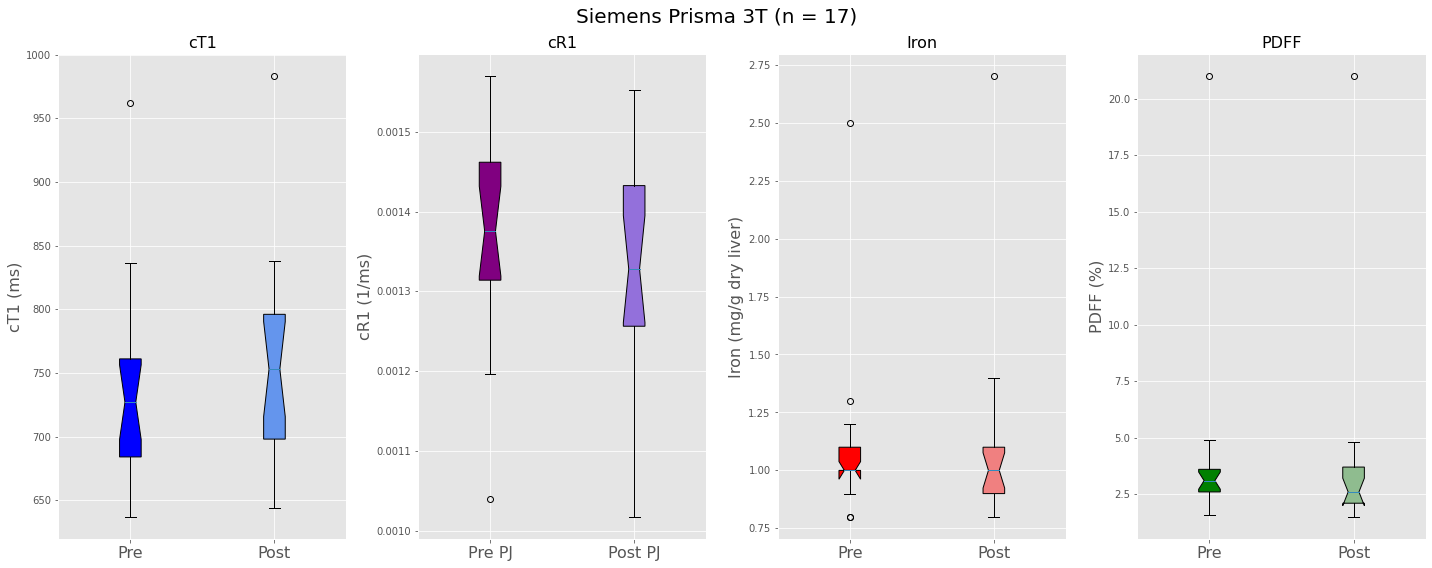

In [16]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 8))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

bplot1 = axes[0].boxplot([PA["cT1 median (Pre PJ)"],PA["cT1 median (Post PJ)"]], patch_artist = True, notch = True)
axes[0].set_title("cT1", fontsize = 16)
axes[0].set_ylabel("cT1 (ms)", fontsize = 16)
axes[0].set_xticklabels(['Pre', 'Post'], fontsize = 16)
colors = ['blue', 'cornflowerblue']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

bplot2 = axes[1].boxplot([PA['cR1 median (Pre PJ)'], PA['cR1 median (Post PJ)']], patch_artist = True, notch = True)
axes[1].set_title('cR1', fontsize = 16)
axes[1].set_ylabel('cR1 (1/ms)', fontsize = 16)
axes[1].set_xticklabels(['Pre PJ', 'Post PJ'], fontsize = 16)
colors = ['purple', 'mediumpurple']
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor(color)

bplot3 = axes[2].boxplot([PA["Iron median (Pre PJ)"],PA["Iron median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'red'))
axes[2].set_title("Iron", fontsize = 16)
axes[2].set_ylabel("Iron (mg/g dry liver)", fontsize = 16)
axes[2].set_xticklabels(['Pre', 'Post'], fontsize = 16)
colors = ['red', 'lightcoral']
for patch, color in zip(bplot3['boxes'], colors):
    patch.set_facecolor(color)

bplot4 = axes[3].boxplot([PA["PDFF median (Pre PJ)"],PA["PDFF median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'green'))
axes[3].set_title("PDFF", fontsize = 16)
axes[3].set_ylabel("PDFF (%)", fontsize = 16)
axes[3].set_xticklabels(['Pre', 'Post'], fontsize = 16)
colors = ['green', 'darkseagreen']
for patch, color in zip(bplot4['boxes'], colors):
    patch.set_facecolor(color)
print('There was a outlier in the cR1 metric for the 3T Prisma Pre PJ group. From visual point of view, cT1 and cR1 groups follow close to normal distribution while not the iron and PDFF group')
plt.tight_layout()

#plt.savefig("PA Box.png")

From visual point of view, cT1 and cR1 groups follow close to normal distribution while not the iron and PDFF group. There is less outlier in the 1.5T data than that for 3T


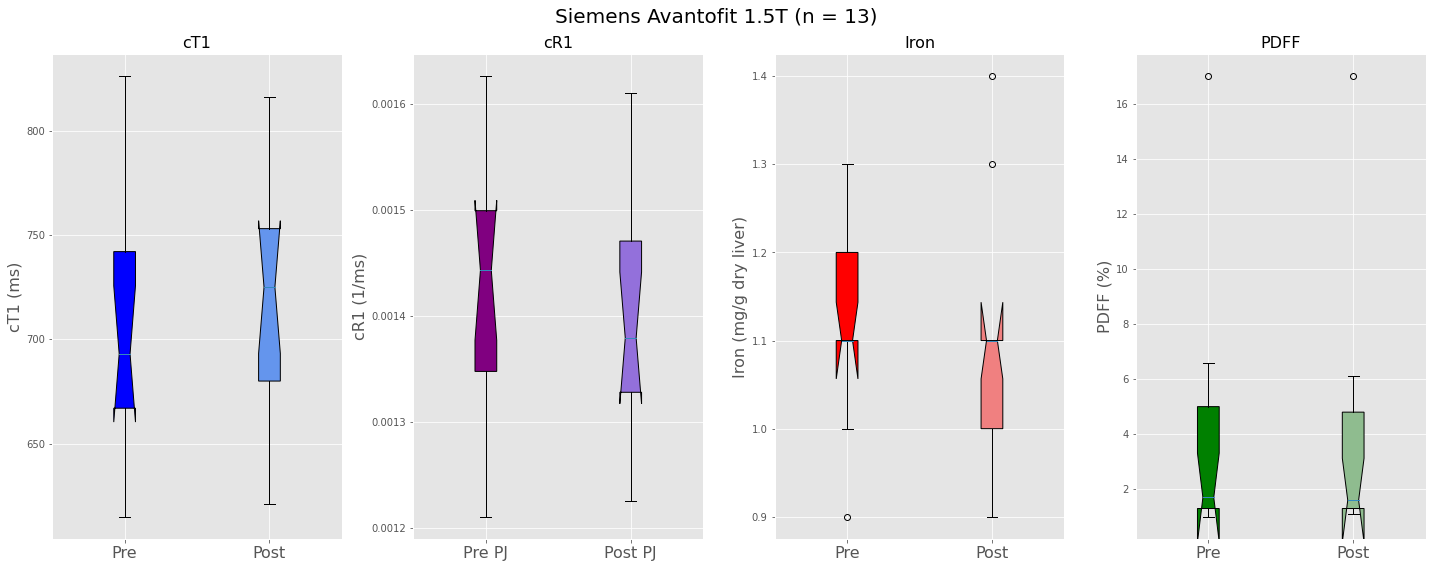

In [17]:
# Plor box plot to see the distributiont of the paried values.

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,8))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

bplot0 = axes[0].boxplot([AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"]], patch_artist = True, notch = True)
axes[0].set_title("cT1", fontsize = 16)
axes[0].set_ylabel("cT1 (ms)", fontsize = 16)
axes[0].set_xticklabels(['Pre', 'Post'], fontsize = 16)
colors = ['blue', 'cornflowerblue']
for patch, color in zip(bplot0['boxes'], colors):
    patch.set_facecolor(color)


bplot1 = axes[1].boxplot([AV['cR1 median (Pre PJ)'], AV['cR1 median (Post PJ)']], patch_artist = True, notch = True)
axes[1].set_title('cR1', fontsize = 16)
axes[1].set_ylabel('cR1 (1/ms)', fontsize = 16)
axes[1].set_xticklabels(['Pre PJ', 'Post PJ'], fontsize = 16)
colors = ['purple', 'mediumpurple']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

bplot2 = axes[2].boxplot([AV["Iron median (Pre PJ)"],AV["Iron median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'red'))
axes[2].set_title("Iron", fontsize = 16)
axes[2].set_ylabel("Iron (mg/g dry liver)", fontsize = 16)
axes[2].set_xticklabels(['Pre', 'Post'], fontsize = 16)
colors = ['red', 'lightcoral']
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor(color)

bplot3 = axes[3].boxplot([AV["PDFF median (Pre PJ)"],AV["PDFF median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'green'))
axes[3].set_title("PDFF", fontsize = 16)
axes[3].set_ylabel("PDFF (%)", fontsize = 16)
axes[3].set_xticklabels(['Pre', 'Post'], fontsize = 16)
colors = ['green', 'darkseagreen']
for patch, color in zip(bplot3['boxes'], colors):
    patch.set_facecolor(color)

print('From visual point of view, cT1 and cR1 groups follow close to normal distribution while not the iron and PDFF group. There is less outlier in the 1.5T data than that for 3T')
plt.tight_layout()
#plt.savefig("AV Box.png")

## Histogram

It is hard to judge whether each metric were drawn from normal distribution


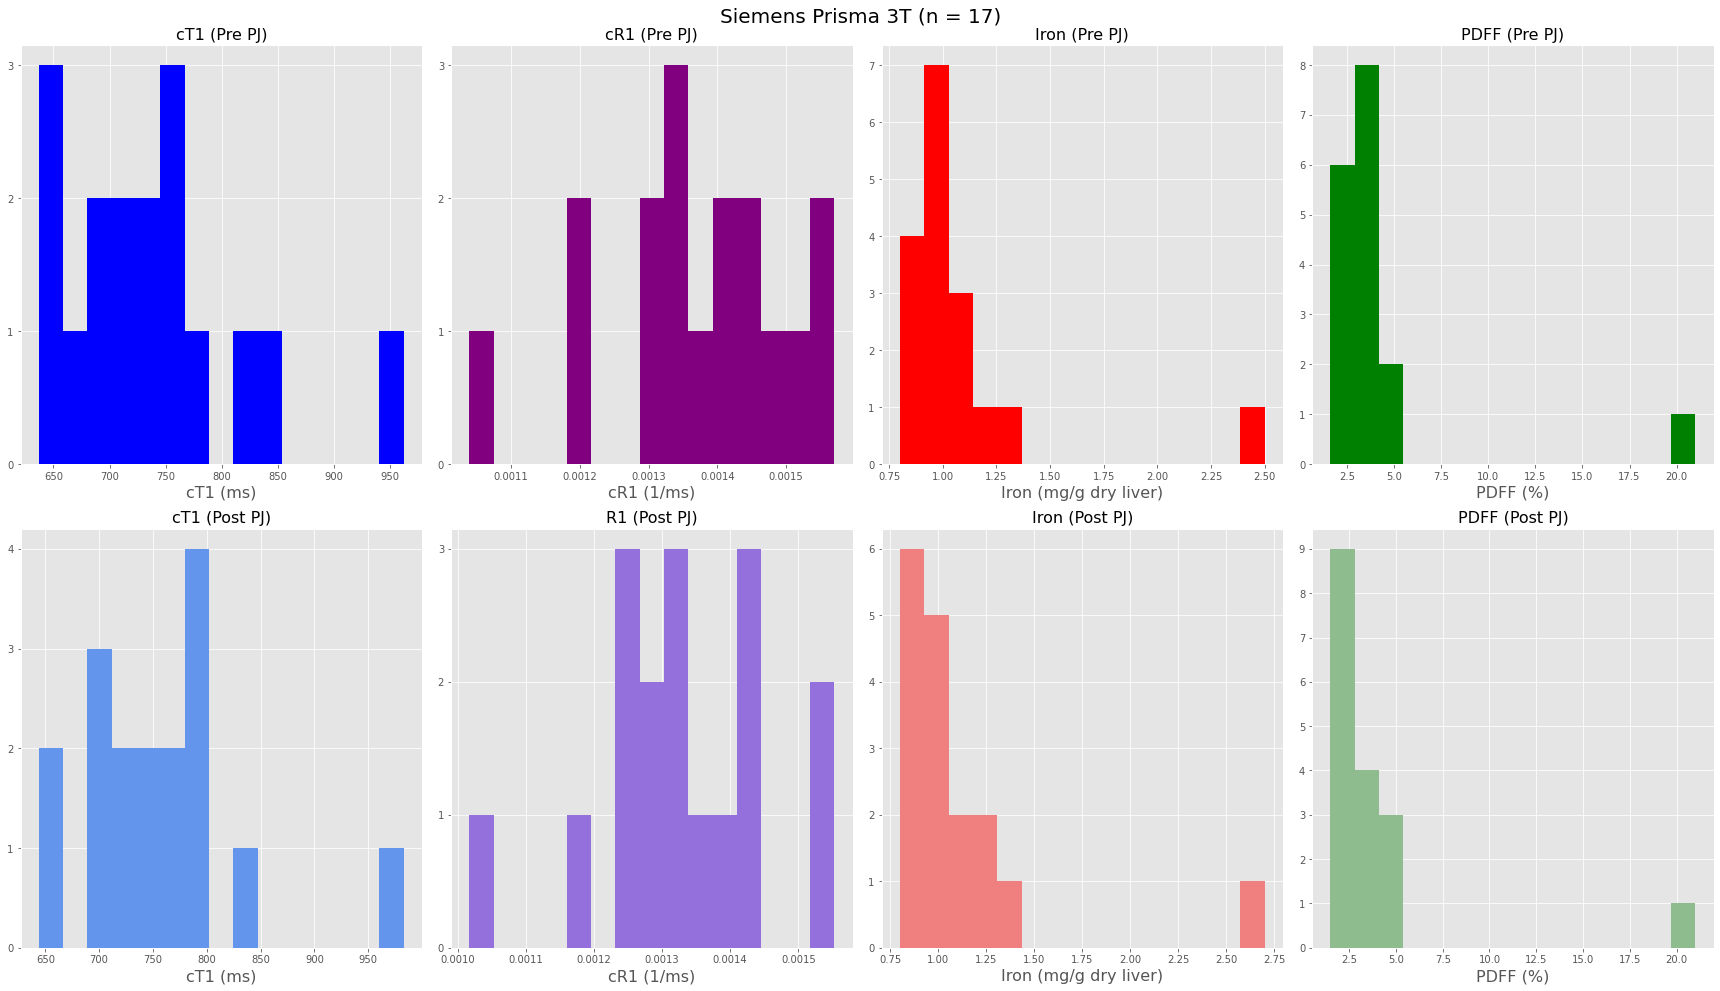

In [18]:
# Histograms to explore data distribution for metric cT1, Iron, PDFF under 3T

plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (24,14))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

axes[0, 0].hist(PA["cT1 median (Pre PJ)"], bins = 15, color = 'blue')
axes[0, 0].set_title("cT1 (Pre PJ)", fontsize = 16)
axes[0, 0].set_xlabel("cT1 (ms)", fontsize = 16)
axes[0, 0].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[0, 1].hist(PA['cR1 median (Pre PJ)'], bins = 15, color = 'purple')
axes[0, 1].set_title('cR1 (Pre PJ)', fontsize = 16)
axes[0, 1].set_xlabel('cR1 (1/ms)', fontsize = 16)
axes[0, 1].yaxis.set_major_locator(MaxNLocator(integer = True))


axes[0, 2].hist(PA["Iron median (Pre PJ)"], bins = 15, color = 'red')
axes[0, 2].set_title("Iron (Pre PJ)", fontsize = 16)
axes[0, 2].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)
axes[0, 2].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[0, 3].hist(PA["PDFF median (Pre PJ)"], bins = 15, color = 'green')
axes[0, 3].set_title("PDFF (Pre PJ)", fontsize = 16)
axes[0, 3].set_xlabel("PDFF (%)", fontsize = 16)
axes[0, 3].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 0].hist(PA["cT1 median (Post PJ)"], bins = 15, color = 'cornflowerblue')
axes[1, 0].set_title("cT1 (Post PJ)", fontsize = 16)
axes[1, 0].set_xlabel("cT1 (ms)", fontsize = 16)
axes[1, 0].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 1].hist(PA['cR1 median (Post PJ)'], bins = 15, color = 'mediumpurple')
axes[1, 1].set_title('R1 (Post PJ)', fontsize = 16)
axes[1, 1].set_xlabel('cR1 (1/ms)', fontsize = 16)
axes[1, 1].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 2].hist(PA["Iron median (Post PJ)"], bins = 15, color = 'lightcoral')
axes[1, 2].set_title("Iron (Post PJ)", fontsize = 16)
axes[1, 2].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)
axes[1, 2].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 3].hist(PA["PDFF median (Post PJ)"], bins = 15, color = 'darkseagreen')
axes[1, 3].set_title("PDFF (Post PJ)", fontsize = 16)
axes[1, 3].set_xlabel("PDFF (%)", fontsize = 16)
axes[1, 3].yaxis.set_major_locator(MaxNLocator(integer = True))
print('It is hard to judge whether each metric were drawn from normal distribution')
plt.tight_layout()
#plt.savefig("PA Hist bin = 15.png")

There are many zero iron measurements.
It is hard to judge whether each metric were drawn from normal distribution


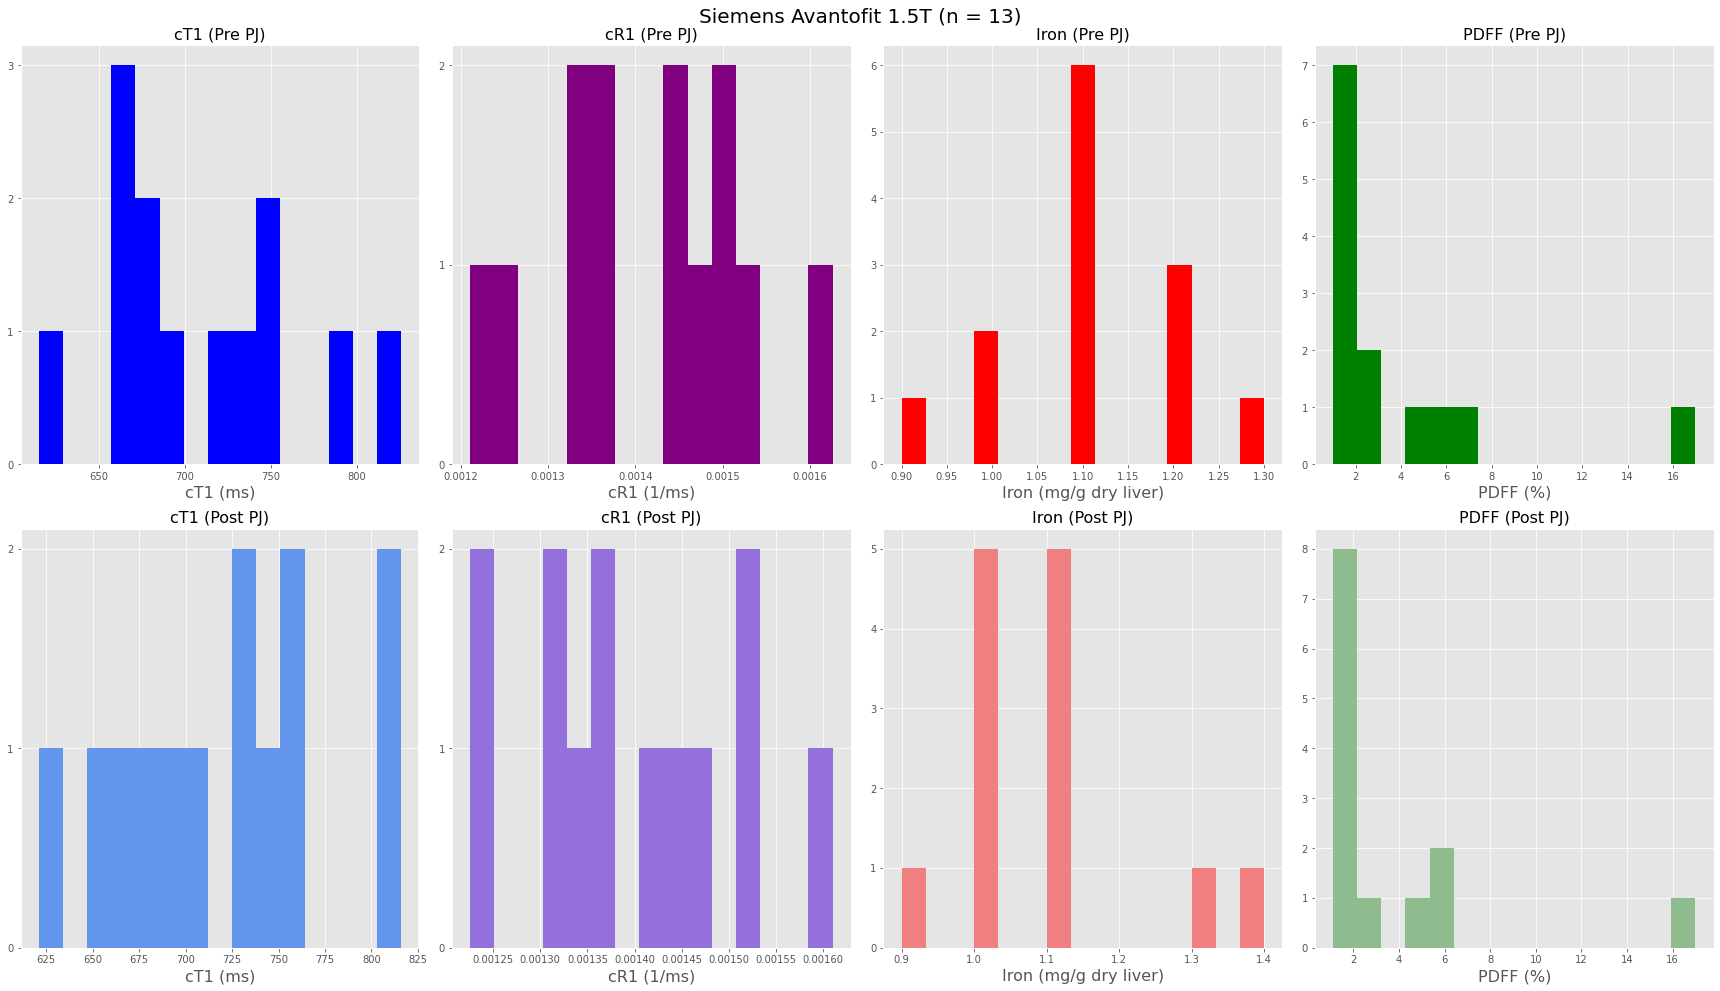

In [19]:
# Histograms to explore data distribution for metric cT1, Iron, PDFF under 1.5T

plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (24,14))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

axes[0, 0].hist(AV["cT1 median (Pre PJ)"], bins = 15, color = 'blue')
axes[0, 0].set_title("cT1 (Pre PJ)", fontsize = 16)
axes[0, 0].set_xlabel("cT1 (ms)", fontsize = 16)
axes[0, 0].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[0, 1].hist(AV['cR1 median (Pre PJ)'], bins = 15, color = 'purple')
axes[0, 1].set_title('cR1 (Pre PJ)', fontsize = 16)
axes[0, 1].set_xlabel('cR1 (1/ms)', fontsize = 16)
axes[0, 1].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[0, 2].hist(AV["Iron median (Pre PJ)"], bins = 15, color = 'red')
axes[0, 2].set_title("Iron (Pre PJ)", fontsize = 16)
axes[0, 2].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)
axes[0, 2].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[0, 3].hist(AV["PDFF median (Pre PJ)"], bins = 15, color = 'green')
axes[0, 3].set_title("PDFF (Pre PJ)", fontsize = 16)
axes[0, 3].set_xlabel("PDFF (%)", fontsize = 16)
axes[0, 3].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 0].hist(AV["cT1 median (Post PJ)"], bins = 15, color = 'cornflowerblue')
axes[1, 0].set_title("cT1 (Post PJ)", fontsize = 16)
axes[1, 0].set_xlabel("cT1 (ms)", fontsize = 16)
axes[1, 0].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 1].hist(AV['cR1 median (Post PJ)'], bins = 15, color = 'mediumpurple')
axes[1, 1].set_title('cR1 (Post PJ)', fontsize = 16)
axes[1, 1].set_xlabel('cR1 (1/ms)', fontsize = 16)
axes[1, 1].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 2].hist(AV["Iron median (Post PJ)"], bins = 15, color = 'lightcoral')
axes[1, 2].set_title("Iron (Post PJ)", fontsize = 16)
axes[1, 2].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)
axes[1, 2].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 3].hist(AV["PDFF median (Post PJ)"], bins = 15, color = 'darkseagreen')
axes[1, 3].set_title("PDFF (Post PJ)", fontsize = 16)
axes[1, 3].set_xlabel("PDFF (%)", fontsize = 16)
axes[1, 3].yaxis.set_major_locator(MaxNLocator(integer = True))

print('There are many zero iron measurements.')
print('It is hard to judge whether each metric were drawn from normal distribution')
plt.tight_layout()
# #plt.savefig("AV Hist bin 15.png")

# Visualise Trend

## Bar Plot
This is help to get a grasp of the differences of netrics before and after pineapple juice ingestion on a individual level.

In [90]:

PA_cT1_dif  = PA["cT1 median (Post PJ)"] -  PA["cT1 median (Pre PJ)"]
PA_cR1_dif  = PA["cR1 median (Post PJ)"] -  PA["cR1 median (Pre PJ)"]
PA_Iron_dif = PA["Iron median (Post PJ)"] - PA["Iron median (Pre PJ)"]
PA_PDFF_dif = PA["PDFF median (Post PJ)"] - PA["PDFF median (Pre PJ)"]

PA["cT1 Dif"]  = PA_cT1_dif
PA["cR1 Dif"]  = PA_cR1_dif
PA["Iron Dif"] = PA_Iron_dif
PA["PDFF Dif"] = PA_PDFF_dif

PA['median_cT1Diff']  = PA_cT1_dif.median().round(2)
PA['median_cR1Diff']  = PA_cR1_dif.median().round(2)
PA['median_IronDiff'] = PA_Iron_dif.median().round(2)
PA['median_PDFFDiff'] = PA_PDFF_dif.median().round(2)

PA['mean_cT1Diff']  = PA_cT1_dif.mean().round(2)
PA['mean_cR1Diff']  = PA_cR1_dif.mean().round(2)
PA['mean_IronDiff'] = PA_Iron_dif.mean().round(2)
PA['mean_PDFFDiff'] = PA_PDFF_dif.mean().round(2)

print(PA['median_cT1Diff'].unique())
print(PA['mean_cT1Diff'].unique())
print(PA['median_cR1Diff'].unique())
print(PA['mean_cR1Diff'].unique())
print(PA['median_IronDiff'].unique())
print(PA['mean_IronDiff'].unique())
print(PA['median_PDFFDiff'].unique())
print(PA['mean_PDFFDiff'].unique())

KeyError: 'cR1 median (Post PJ)'

In [21]:
type(PA['median_cT1Diff'].unique())

numpy.ndarray

/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_16428/3060418489.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_16428/3060418489.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_16428/3060418489.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_16428/3060418489.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')


The difference between the population median and population mean for each metric delta value is smaller than that for 1.5T. It is expected that, the delta of cT1 and delta of cR1 were in opposite side of the horizontal axis.


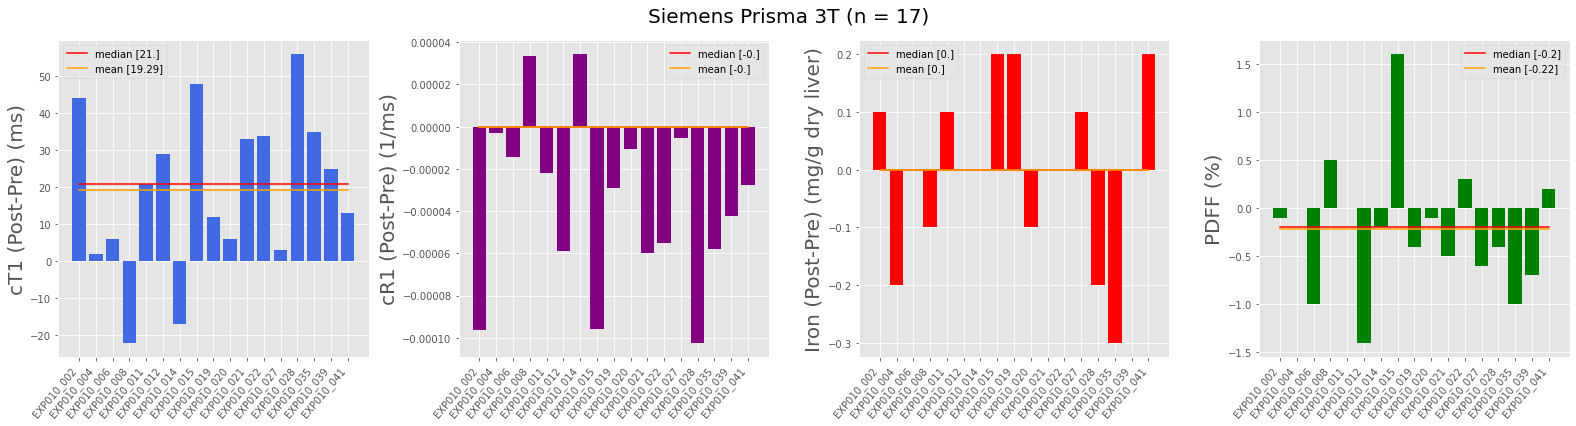

In [22]:

plt.style.use('ggplot')
fig = plt.figure(figsize = (22,6))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

ax1 = fig.add_subplot(141)
plt.bar(PA["Record Id"], PA["cT1 Dif"], color = "royalblue")
plt.plot(PA["Record Id"], PA["median_cT1Diff"], color = 'red', label = 'median '+ str(PA['median_cT1Diff'].unique()))
plt.plot(PA["Record Id"], PA["mean_cT1Diff"], color = 'orange', label = 'mean '+ str(PA['mean_cT1Diff'].unique()))
plt.legend(loc='upper left')
ax1.set_ylabel("cT1 (Post-Pre) (ms)", fontsize = 20)
ax1.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')

ax2 = fig.add_subplot(142)
plt.bar(PA["Record Id"], PA["cR1 Dif"], color = "purple")
plt.plot(PA["Record Id"], PA["median_cR1Diff"], color = 'red', label = 'median '+ str(PA['median_cR1Diff'].unique()))
plt.plot(PA["Record Id"], PA["mean_cR1Diff"], color = 'orange',label = 'mean '+ str(PA['median_cR1Diff'].unique()))
plt.legend(loc='upper right')
ax2.set_ylabel("cR1 (Post-Pre) (1/ms)", fontsize = 20)
ax2.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')

ax3 = fig.add_subplot(143)
plt.bar(PA["Record Id"], PA["Iron Dif"], color = "red")
plt.plot(PA["Record Id"], PA["median_IronDiff"], color = 'red', label = 'median '+ str(PA['median_IronDiff'].unique()))
plt.plot(PA["Record Id"], PA["mean_IronDiff"], color = 'orange', label = 'mean '+ str(PA['mean_IronDiff'].unique()))
plt.legend(loc='upper left')
ax3.set_ylabel("Iron (Post-Pre) (mg/g dry liver)", fontsize = 20)
ax3.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')

ax4 = fig.add_subplot(144)
plt.bar(PA["Record Id"], PA["PDFF Dif"], color = "green")
plt.plot(PA["Record Id"], PA["median_PDFFDiff"], color = 'red', label = 'median '+ str(PA['median_PDFFDiff'].unique()))
plt.plot(PA["Record Id"], PA["mean_PDFFDiff"], color = 'orange', label = 'mean '+ str(PA['mean_PDFFDiff'].unique()))
plt.legend(loc='upper right')
ax4.set_ylabel("PDFF (%)", fontsize = 20)
ax4.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')

plt.tight_layout()
#plt.savefig("PA Bar Delta.png")

print('The difference between the population median and population mean for each metric delta value is smaller than that for 1.5T. It is expected that, the delta of cT1 and delta of cR1 were in opposite side of the horizontal axis.')

In [23]:
AV['cT1_dif']  = AV["cT1 median (Post PJ)"] -  AV["cT1 median (Pre PJ)"]
AV['cR1_dif']  = AV["cR1 median (Post PJ)"] -  AV["cR1 median (Pre PJ)"]
AV['Iron_dif'] = AV["Iron median (Post PJ)"] - AV["Iron median (Pre PJ)"]
AV['PDFF_dif'] = AV["PDFF median (Post PJ)"] - AV["PDFF median (Pre PJ)"]

AV['median_cT1Diff']  = AV['cT1_dif'].median().round(2)
AV['median_cR1Diff']  = AV['cR1_dif'].median().round(2)
AV['median_IronDiff'] = AV['Iron_dif'].median().round(2)
AV['median_PDFFDiff'] = AV['PDFF_dif'].median().round(2)

AV['mean_cT1Diff']  = AV['cT1_dif'].mean().round(2)
AV['mean_cR1Diff']  = AV['cR1_dif'].mean().round(2)
AV['mean_IronDiff'] = AV['Iron_dif'].mean().round(2)
AV['mean_PDFFDiff'] = AV['PDFF_dif'].mean().round(2)

print(AV['median_cT1Diff'].unique(), AV['mean_cT1Diff'].unique())
print(AV['median_cR1Diff'].unique(), AV['mean_cR1Diff'].unique())
print(AV['median_IronDiff'].unique(), AV['mean_IronDiff'].unique())
print(AV['median_PDFFDiff'].unique(), AV['mean_PDFFDiff'].unique())


[12.] [9.38]
[-0.] [-0.]
[0.] [-0.02]
[-0.1] [-0.15]


/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_16428/3465890451.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(AV['Record Id'], rotation = 50, ha = 'right')
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_16428/3465890451.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(AV['Record Id'], rotation = 50, ha = 'right')
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_16428/3465890451.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(AV['Record Id'], rotation = 50, ha = 'right')
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_16428/3465890451.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(AV['Record Id'], rotation = 50, ha = 'right')


Note that in iron metric (middle graph), there were a lot of quantified iron value effectively being zero and therefore, the difference/delta/change in iron were also zero for these case. The red lines indicate the population median for each metric while orange lines indicate the population mean for each metric


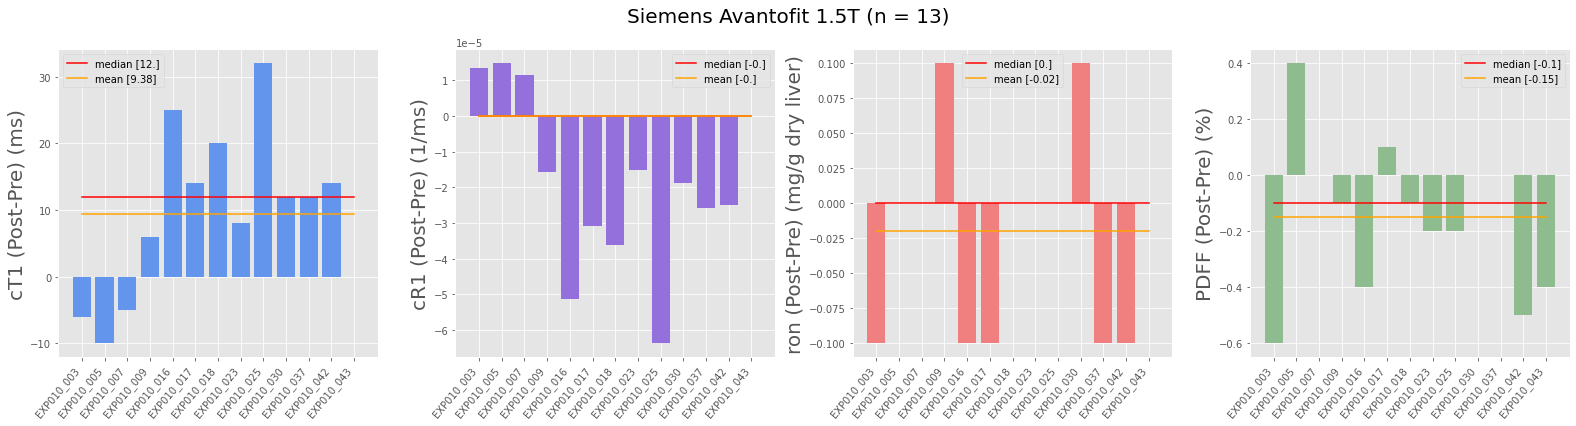

In [24]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (22,6))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

ax1 = fig.add_subplot(141)
plt.bar(AV['Record Id'], AV['cT1_dif'], color = 'cornflowerblue')
plt.plot(AV['Record Id'], AV['median_cT1Diff'], color = 'red', label = 'median '+ str(AV['median_cT1Diff'].unique()))
plt.plot(AV['Record Id'], AV['mean_cT1Diff'], color = 'orange', label = 'mean '+ str(AV['mean_cT1Diff'].unique()))
plt.legend(loc = 'best')
ax1.set_ylabel('cT1 (Post-Pre) (ms)', fontsize = 20)
ax1.set_xticklabels(AV['Record Id'], rotation = 50, ha = 'right')

ax2 = fig.add_subplot(142)
plt.bar(AV['Record Id'], AV['cR1_dif'], color = 'mediumpurple')
plt.plot(AV['Record Id'], AV['median_cR1Diff'], color = 'red', label = 'median '+ str(AV['median_cR1Diff'].unique()))
plt.plot(AV['Record Id'], AV['mean_cR1Diff'], color = 'orange', label = 'mean '+ str(AV['mean_cR1Diff'].unique()))
plt.legend(loc = 'best')
ax2.set_ylabel('cR1 (Post-Pre) (1/ms)', fontsize = 20)
ax2.set_xticklabels(AV['Record Id'], rotation = 50, ha = 'right')

ax3 = fig.add_subplot(143)
plt.bar(AV['Record Id'], AV['Iron_dif'], color = 'lightcoral')
plt.plot(AV['Record Id'], AV['median_IronDiff'], color = 'red', label = 'median '+ str(AV['median_IronDiff'].unique()))
plt.plot(AV['Record Id'], AV['mean_IronDiff'], color = 'orange', label = 'mean '+ str(AV['mean_IronDiff'].unique()))
plt.legend(loc = 'best')
ax3.set_ylabel('ron (Post-Pre) (mg/g dry liver)', fontsize = 20)
ax3.set_xticklabels(AV['Record Id'], rotation = 50, ha = 'right')

ax4 = fig.add_subplot(144)
plt.bar(AV['Record Id'], AV['PDFF_dif'], color = 'darkseagreen')
plt.plot(AV['Record Id'], AV['median_PDFFDiff'], color = 'red', label = 'median '+ str(AV['median_PDFFDiff'].unique()))
plt.plot(AV['Record Id'], AV['mean_PDFFDiff'], color = 'orange', label = 'mean '+ str(AV['mean_PDFFDiff'].unique()))
plt.legend(loc = 'best')
ax4.set_ylabel('PDFF (Post-Pre) (%)', fontsize = 20)
ax4.set_xticklabels(AV['Record Id'], rotation = 50, ha = 'right')

plt.tight_layout()

print('Note that in iron metric (middle graph), there were a lot of quantified iron value effectively being zero and therefore, the difference/delta/change in iron were also zero for these case. The red lines indicate the population median for each metric while orange lines indicate the population mean for each metric')
#plt.savefig('AV Bar Delta.png')

## Scatter Line Plot
This is to help us visually inspect the trend of the the dataset.

In [25]:
#define the plotting function
def PrePost(a, b):
    plt.scatter(np.zeros(data_length), a, color = "blue")
    plt.scatter(np.ones(data_length), b, color = "green")

    for i in range(data_length):
        plt.plot( [0,1], [a.iloc[i], b.iloc[i]], color = "k")
    
    plt.plot([0,1], [np.median(a), np.median(b)], color = "red", linewidth = 4.0, label = 'median')
    plt.plot([0,1], [np.mean(a), np.mean(b)], color = "orange", linewidth = 4.0, label = 'mean')
    plt.legend(loc = 'upper center')

The red lines connect the population median pre PJ to population median pre PJ for each metric, while the orange lines connect the population mean pre PJ to population mean post PJ for each metric.
The visual representation of the line trends showed increased cT1 values and decreased cR1 values after pineapple juice ingestion measured under 3T field strength


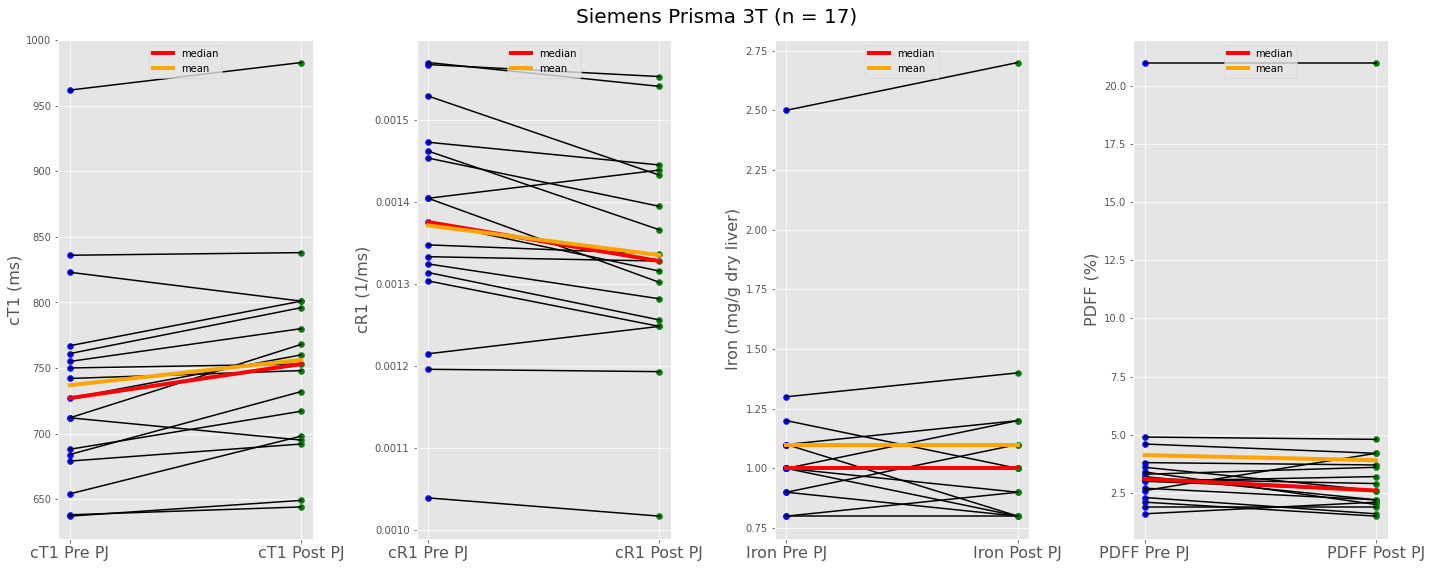

In [26]:
# Scatter Line trend plot for 3T
plt.style.use('ggplot')
fig = plt.figure(figsize = (20,8))
fig.suptitle("Siemens Prisma 3T (n = 17)", fontsize = 20)

data_length = len(PA["cT1 median (Pre PJ)"])

fig.add_subplot(141)
PrePost(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"])
plt.xticks([0,1], ["cT1 Pre PJ", "cT1 Post PJ"], fontsize = 16) 
plt.ylabel("cT1 (ms)", fontsize = 16)

fig.add_subplot(142)
PrePost(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"])
plt.xticks([0,1], ["cR1 Pre PJ", "cR1 Post PJ"], fontsize = 16) 
plt.ylabel("cR1 (1/ms)", fontsize = 16)

fig.add_subplot(143)
PrePost(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"])
plt.xticks([0,1], ["Iron Pre PJ", "Iron Post PJ"], fontsize = 16)
plt.ylabel("Iron (mg/g dry liver)", fontsize = 16)

fig.add_subplot(144)
PrePost(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"])
plt.xticks([0,1], ["PDFF Pre PJ", "PDFF Post PJ"], fontsize = 16)
plt.ylabel("PDFF (%)", fontsize = 16)

plt.tight_layout()
#plt.savefig("PA Trend.png")

print('The red lines connect the population median pre PJ to population median pre PJ for each metric, while the orange lines connect the population mean pre PJ to population mean post PJ for each metric.')
print('The visual representation of the line trends showed increased cT1 values and decreased cR1 values after pineapple juice ingestion measured under 3T field strength')

The red lines connect the population median pre PJ to population median pre PJ for each metric, while the orange lines connect the population mean pre PJ to population mean post PJ for each metric.
From both population median and population mean, the visual representation of the line trends showed an increase in cT1 values and decrease in cR1 values measured under 1.5T field strength. This is also showed in 3T data. It was also found that the population median showed a greater change comparing to population mean.


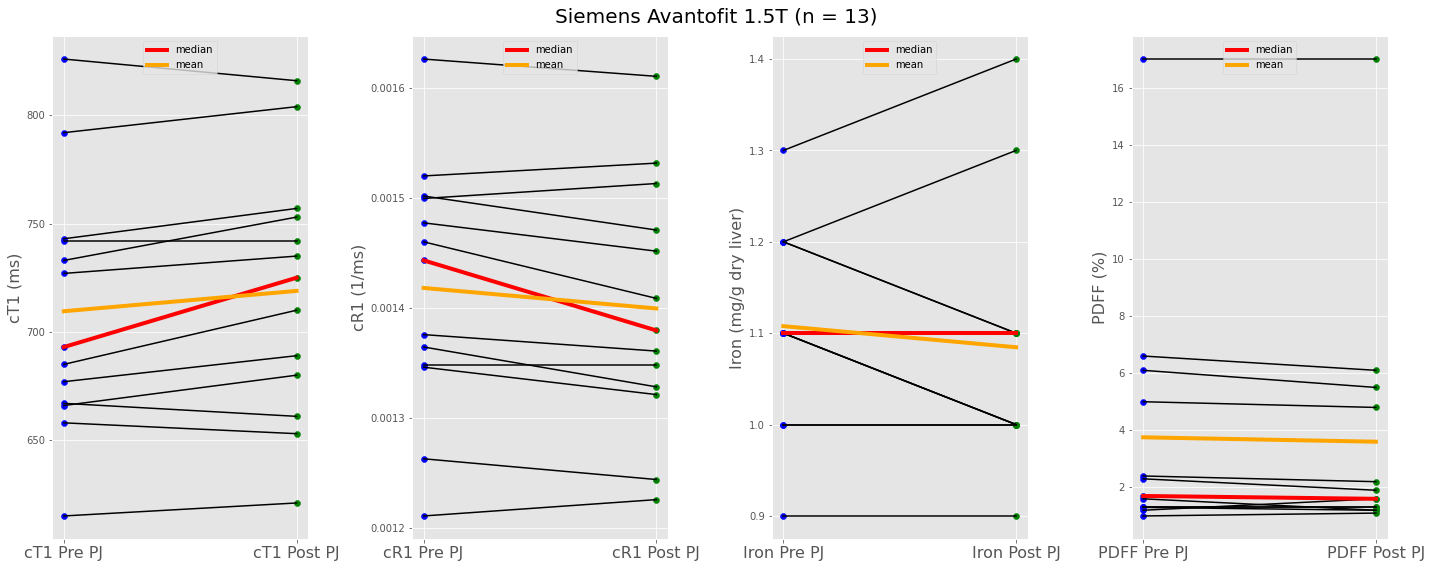

In [27]:
# Scatter Line trend plot for 1.5T
plt.style.use('ggplot')
fig = plt.figure(figsize = (20,8))
fig.suptitle("Siemens Avantofit 1.5T (n = 13)", fontsize = 20)

data_length = len(AV["cT1 median (Pre PJ)"])

fig.add_subplot(141)
PrePost(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"])
plt.xticks([0,1], ["cT1 Pre PJ", "cT1 Post PJ"], fontsize = 16) 
plt.ylabel("cT1 (ms)", fontsize = 16)

fig.add_subplot(142)
PrePost(AV["cR1 median (Pre PJ)"], AV["cR1 median (Post PJ)"])
plt.xticks([0,1], ["cR1 Pre PJ", "cR1 Post PJ"], fontsize = 16) 
plt.ylabel("cR1 (1/ms)", fontsize = 16)

fig.add_subplot(143)
PrePost(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"])
plt.xticks([0,1], ["Iron Pre PJ", "Iron Post PJ"], fontsize = 16)
plt.ylabel("Iron (mg/g dry liver)", fontsize = 16)

fig.add_subplot(144)
PrePost(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"])
plt.xticks([0,1], ["PDFF Pre PJ", "PDFF Post PJ"], fontsize = 16)
plt.ylabel("PDFF (%)", fontsize = 16)

plt.tight_layout()

#plt.savefig("AV Trend.png")
print('The red lines connect the population median pre PJ to population median pre PJ for each metric, while the orange lines connect the population mean pre PJ to population mean post PJ for each metric.')
print('From both population median and population mean, the visual representation of the line trends showed an increase in cT1 values and decrease in cR1 values measured under 1.5T field strength. This is also showed in 3T data. It was also found that the population median showed a greater change comparing to population mean.')

## Bland Altman Analysis
Bland Altman analysis help visually inspect whether the differences is smaller than measurement uncertainty (i.e. noise). The final conclusion will only be drawn after also considering the repeatability experiment conducted without the introduction with pineapple juice.

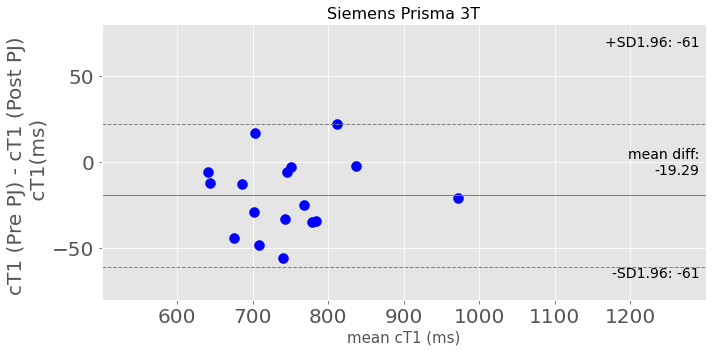

In [28]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"blue", 's':100})
ax.set_ylabel("cT1 (Pre PJ) - cT1 (Post PJ) \n cT1(ms)", fontsize = 20)
ax.set_title("Siemens Prisma 3T", fontsize = 16)
ax.set_xlim(500,1300)
ax.set_ylim(-80,80)
ax.set_xticks([600, 700, 800, 900, 1000, 1100, 1200])
ax.set_yticks([-50, 0, 50])
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('mean cT1 (ms)')
plt.tight_layout()
#plt.savefig("PA cT1 Bland Altman Nov 10.png")

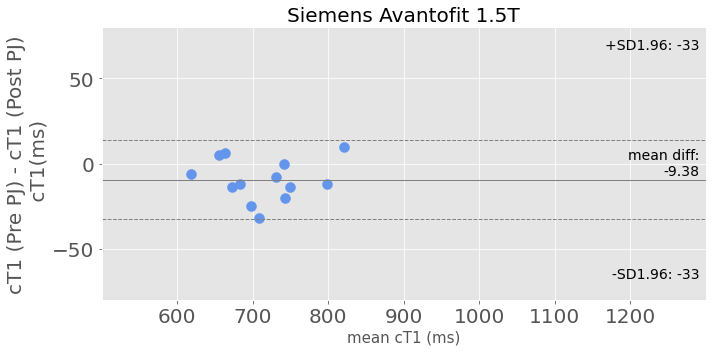

In [29]:
# Plot Bland Altman plots 
# https://stackoverflow.com/questions/16399279/bland-altman-plot-in-python
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"cornflowerblue", 's':100})
ax.set_xlim(500,1300)
ax.set_ylim(-80,80)
ax.set_xticks([600, 700, 800, 900, 1000, 1100, 1200])
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yticks([-50, 0, 50])
ax.set_ylabel("cT1 (Pre PJ) - cT1 (Post PJ)\n cT1(ms)", fontsize = 20)
ax.set_title("Siemens Avantofit 1.5T", fontsize = 20)
ax.set_xlabel('mean cT1 (ms)')
plt.tight_layout() 
#plt.savefig("AV cT1 Bland Altman Nov 10.png")

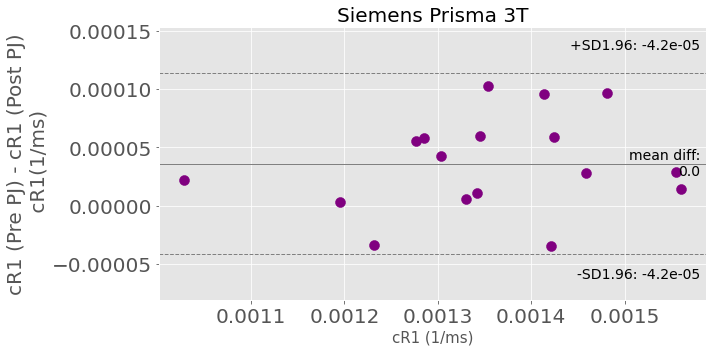

In [30]:
# Bland Altman analysis with Delta R1 for 3T Prisma data
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"purple", 's':100})
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_ylabel("cR1 (Pre PJ) - cR1 (Post PJ)\n cR1(1/ms)", fontsize = 20)
ax.set_title("Siemens Prisma 3T", fontsize = 20)
ax.set_xlabel('cR1 (1/ms)')
plt.tight_layout()
#plt.savefig("")

/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_16428/1063900487.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0.0012, 0.00125, 0.0013, 0.00135, 0.0014, 0.00145, 0.0015, 0.00155 ,0.0016], rotation = 45, ha = 'left')


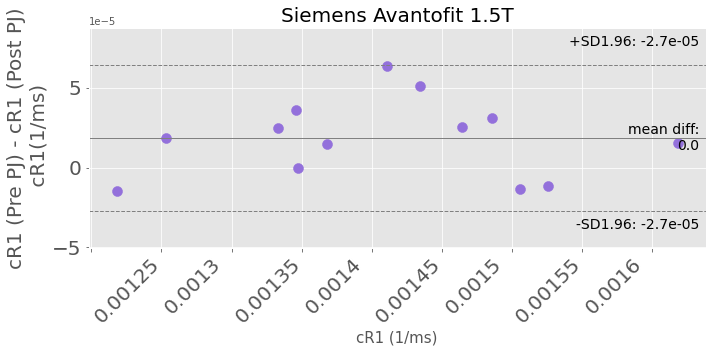

In [31]:
# Bland Altman analysis with Delta R1 for 1.5T Prisma data
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(AV["cR1 median (Pre PJ)"], AV["cR1 median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"mediumpurple", 's':100})
ax.set_xticklabels([0.0012, 0.00125, 0.0013, 0.00135, 0.0014, 0.00145, 0.0015, 0.00155 ,0.0016], rotation = 45, ha = 'left')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_ylabel("cR1 (Pre PJ) - cR1 (Post PJ)\n cR1(1/ms)", fontsize = 20)
ax.set_title("Siemens Avantofit 1.5T", fontsize = 20)
ax.set_xlabel('cR1 (1/ms)')
plt.tight_layout()
#plt.savefig("")

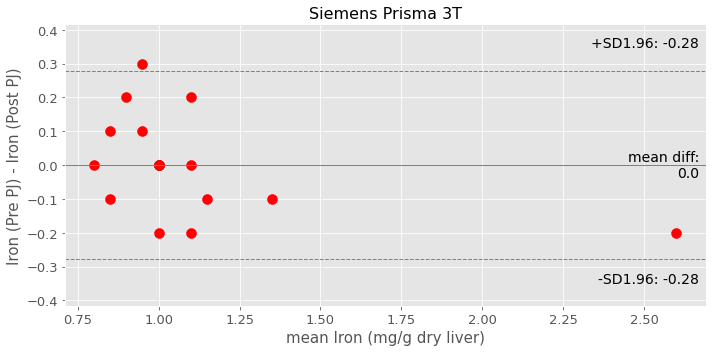

In [32]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(PA['Iron median (Pre PJ)'], PA['Iron median (Post PJ)'],  ax = ax, scatter_kwds = {'color':'red', 's': 100})
ax.set_ylabel('Iron (Pre PJ) - Iron (Post PJ)')
ax.set_title('Siemens Prisma 3T', fontsize = 16)
ax.set_xlabel('mean Iron (mg/g dry liver)')
plt.tight_layout()
#plt.savefig('PA Iron Bland Altman.png')

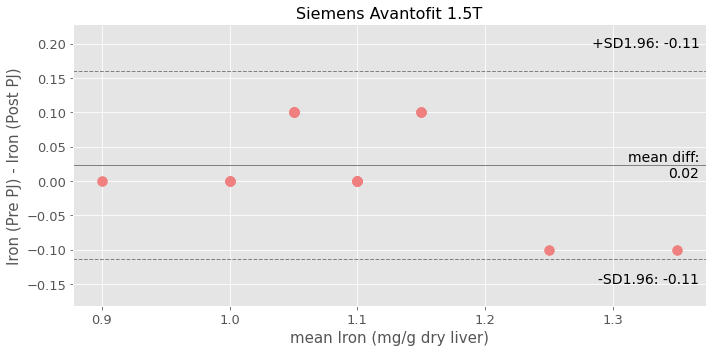

In [33]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(AV['Iron median (Pre PJ)'], AV['Iron median (Post PJ)'],  ax = ax, scatter_kwds = {'color':'lightcoral', 's':100})
ax.set_ylabel('Iron (Pre PJ) - Iron (Post PJ)')
ax.set_title('Siemens Avantofit 1.5T', fontsize = 16)
ax.set_xlabel('mean Iron (mg/g dry liver)')
plt.tight_layout()
#plt.savefig('AV Iron Bland Altman.png')

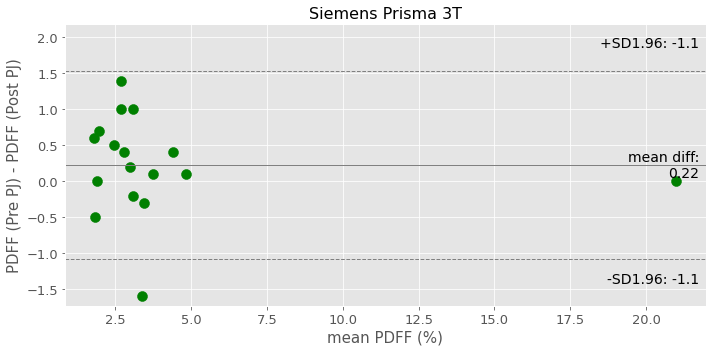

In [34]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(PA['PDFF median (Pre PJ)'], PA['PDFF median (Post PJ)'],  ax = ax, scatter_kwds = {'color':'green', 's':100})
ax.set_ylabel('PDFF (Pre PJ) - PDFF (Post PJ)')
ax.set_title('Siemens Prisma 3T', fontsize = 16)
ax.set_xlabel('mean PDFF (%)')
plt.tight_layout()
#plt.savefig('PA PDFF Bland Altman.png')

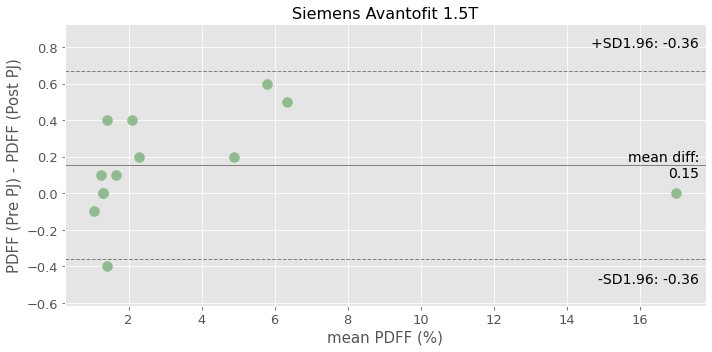

In [35]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(AV['PDFF median (Pre PJ)'], AV['PDFF median (Post PJ)'],  ax = ax, scatter_kwds = {'color':'darkseagreen', 's':100})
ax.set_ylabel('PDFF (Pre PJ) - PDFF (Post PJ)')
ax.set_title('Siemens Avantofit 1.5T', fontsize = 16)
ax.set_xlabel('mean PDFF (%)')
plt.tight_layout()
#3plt.savefig('AV PDFF Bland Altman.png')

## Repeatability Experiment

In [91]:
#TODO: Import the repeatability dataset

# Shapiro Wilk Test for Normality

In [36]:

a = stats.shapiro(PA['cT1 median (Pre PJ)'])
a1 = stats.shapiro(PA['cT1 median (Post PJ)'])
b = stats.shapiro(PA['cR1 median (Pre PJ)'])
b1 = stats.shapiro(PA['cR1 median (Post PJ)'])
c = stats.shapiro(PA['Iron median (Pre PJ)'])
c1 = stats.shapiro(PA['Iron median (Post PJ)'])
d = stats.shapiro(PA['PDFF median (Pre PJ)'])
d1 = stats.shapiro(PA['PDFF median (Post PJ)'])

data = {'Biomarkers' : ['cT1 Pre PJ', 'cT1 (Post PJ)', 'cR1 Pre PJ', 'cR1 (Post PJ)', 'Iron (Pre PJ)', 'Iron (Post PF)', 'PDFF (Pe PJ)', 'PDFF (Post PJ)'], 
        'Shapiro Wilk Test Result (W, p value)': [a, a1, b, b1, c, c1, d, d1], 
        'Normal Distribution?': ['Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No']}
SP = pd.DataFrame(data = data)
SP.style.set_caption('Siemens Prisma 3T')
# dfi.export(SP, 'PA Shapiro Wilk Test for Normality Nov 10.png')

,Biomarkers,"Shapiro Wilk Test Result (W, p value)",Normal Distribution?
0,cT1 Pre PJ,"ShapiroResult(statistic=0.900958240032196, pvalue=0.07047820091247559)",Yes
1,cT1 (Post PJ),"ShapiroResult(statistic=0.9062672257423401, pvalue=0.08653995394706726)",Yes
2,cR1 Pre PJ,"ShapiroResult(statistic=0.9566574096679688, pvalue=0.5697479248046875)",Yes
3,cR1 (Post PJ),"ShapiroResult(statistic=0.960710346698761, pvalue=0.6448699235916138)",Yes
4,Iron (Pre PJ),"ShapiroResult(statistic=0.5656453371047974, pvalue=4.929992883262457e-06)",No
5,Iron (Post PF),"ShapiroResult(statistic=0.5974621772766113, pvalue=9.838609912549146e-06)",No
6,PDFF (Pe PJ),"ShapiroResult(statistic=0.4432595372200012, pvalue=4.433605909071048e-07)",No
7,PDFF (Post PJ),"ShapiroResult(statistic=0.4593563675880432, pvalue=5.966778076071932e-07)",No


In [37]:
# Use Shapio- Wilk test to test Normality
# If W is less than one, the dataset is away from being drawn from normal distribution.
# The p value of Shapiro Wilk Test is to test the hyposthesis of the Shapio-Wilk test to reject the null Ho
# Shapiro Wilk test is quite sensitive, sometimes if the data from histigram seems normallt distributed, it can still be test with parametric t test.
# https://www.youtube.com/watch?v=dRAqSsgkCUc&ab_channel=MatthewE.Clapham


a = stats.shapiro(AV['cT1 median (Pre PJ)'])
a1 = stats.shapiro(AV['cT1 median (Post PJ)'])

b = stats.shapiro(AV['cR1 median (Pre PJ)'])
b1 = stats.shapiro(AV['cR1 median (Post PJ)'])

c = stats.shapiro(AV['Iron median (Pre PJ)'])
c1 = stats.shapiro(AV['Iron median (Post PJ)'])

d = stats.shapiro(AV['PDFF median (Pre PJ)'])
d1 = stats.shapiro(AV['PDFF median (Post PJ)'])

data = {'Biomarkers' : ['cT1 Pre PJ', 'cT1 (Post PJ)', 'cT1 (Pre PJ)', 'cR1 (Post PJ)', 'Iron (Pre PJ)', 'Iron (Post PF)', 'PDFF (Pe PJ)', 'PDFF (Post PJ)'], 
        'Shapiro Wilk Test Result (W, p value)': [a, a1, b, b1, c, c1, d, d1], 
        'Normal Distribution?': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No']}
SP = pd.DataFrame(data = data)
SP.style.set_caption('Siemens Avantofit 1.5T')
# dfi.export(SP, 'AV Shapiro Wilk Test for Normality Nov 10.png')

,Biomarkers,"Shapiro Wilk Test Result (W, p value)",Normal Distribution?
0,cT1 Pre PJ,"ShapiroResult(statistic=0.9594494104385376, pvalue=0.7451412081718445)",Yes
1,cT1 (Post PJ),"ShapiroResult(statistic=0.9780265688896179, pvalue=0.9685270190238953)",Yes
2,cT1 (Pre PJ),"ShapiroResult(statistic=0.9732586145401001, pvalue=0.9298766851425171)",Yes
3,cR1 (Post PJ),"ShapiroResult(statistic=0.9765700697898865, pvalue=0.9585272669792175)",Yes
4,Iron (Pre PJ),"ShapiroResult(statistic=0.926966667175293, pvalue=0.31089308857917786)",Yes
5,Iron (Post PF),"ShapiroResult(statistic=0.8337916135787964, pvalue=0.01767866685986519)",No
6,PDFF (Pe PJ),"ShapiroResult(statistic=0.6438919305801392, pvalue=0.0001609734899830073)",No
7,PDFF (Post PJ),"ShapiroResult(statistic=0.6100608110427856, pvalue=8.008096483536065e-05)",No


In [38]:
# Combining Shapiro Wilk Test for normality result

SW_AV_cT1_Pre = stats.shapiro(AV['cT1 median (Pre PJ)'])
SW_AV_cT1_Post = stats.shapiro(AV['cT1 median (Post PJ)'])

SW_AV_cR1_Pre = stats.shapiro(AV['cR1 median (Pre PJ)'])
SW_AV_cR1_Post = stats.shapiro(AV['cR1 median (Post PJ)'])

SW_AV_Iron_Pre = stats.shapiro(AV['Iron median (Pre PJ)'])
SW_AV_Iron_Post = stats.shapiro(AV['Iron median (Post PJ)'])

SW_AV_PDFF_Pre = stats.shapiro(AV['PDFF median (Pre PJ)'])
SW_AV_PDFF_Post = stats.shapiro(AV['PDFF median (Post PJ)'])

SW_PA_cT1_Pre = stats.shapiro(PA['cT1 median (Pre PJ)'])
SW_PA_cT1_Post = stats.shapiro(PA['cT1 median (Post PJ)'])

SW_PA_cR1_Pre = stats.shapiro(PA['cR1 median (Pre PJ)'])
SW_PA_cR1_Post = stats.shapiro(PA['cR1 median (Post PJ)'])

SW_PA_Iron_Pre = stats.shapiro(PA['Iron median (Pre PJ)'])
SW_PA_Iron_Post = stats.shapiro(PA['Iron median (Post PJ)'])

SW_PA_PDFF_Pre = stats.shapiro(PA['PDFF median (Pre PJ)'])
SW_PA_PDFF_Post = stats.shapiro(PA['PDFF median (Post PJ)'])

data = {
'Field Strength': ['1.5T','1.5T','1.5T','1.5T','1.5T','1.5T', '1.5T','1.5T', '3T','3T','3T','3T','3T','3T', '3T','3T'],
'Biomarkers' : ['cT1 (Pre PJ)', 'cT1 (Post PJ)', 'cR1(Pre PJ)', 'cR1(Post PJ)', 'Iron (Pre PJ)', 'Iron (Post PF)', 'PDFF (Pre PJ)', 'PDFF (Post PJ)', 'cT1 (Pre PJ)', 'cT1 (Post PJ)', 'cR1(Pre PJ)', 'cR1(Post PJ)', 'Iron (Pre PJ)', 'Iron (Post PF)', 'PDFF (Pre PJ)', 'PDFF (Post PJ)'], 
'Shapiro Wilk Test Result (statistic, p value)': [SW_AV_cT1_Pre, SW_AV_cT1_Post, SW_AV_cR1_Pre, SW_AV_cR1_Post, SW_AV_Iron_Pre, SW_AV_Iron_Post, SW_AV_PDFF_Pre, SW_AV_PDFF_Post, SW_PA_cT1_Pre, SW_PA_cT1_Post, SW_PA_cR1_Pre, SW_PA_cR1_Post, SW_PA_Iron_Pre, SW_PA_Iron_Post, SW_PA_PDFF_Pre, SW_PA_PDFF_Post],
'Normal Distribution?': ['Yes', 'Yes', 'Yes', 'Yes','Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No']
}

SWS = pd.DataFrame(data = data) # Shapiro Wilk Test Summary

#dfi.export(SWS, 'Shapiro Wilk Test for Normality Summary Nov 10.png')

print('This suggest that the cT1 is normally distributed and is fit for paired two-sided T-test. But Iron and PDFF data sets do not normal distribution, and therefore to compare the differences pre and post pineapple juice, a wilcoxon test should be performed.')
SWS.style.set_caption('Collective Shapiro Wilk Test')

This suggest that the cT1 is normally distributed and is fit for paired two-sided T-test. But Iron and PDFF data sets do not normal distribution, and therefore to compare the differences pre and post pineapple juice, a wilcoxon test should be performed.


,Field Strength,Biomarkers,"Shapiro Wilk Test Result (statistic, p value)",Normal Distribution?
0,1.5T,cT1 (Pre PJ),"ShapiroResult(statistic=0.9594494104385376, pvalue=0.7451412081718445)",Yes
1,1.5T,cT1 (Post PJ),"ShapiroResult(statistic=0.9780265688896179, pvalue=0.9685270190238953)",Yes
2,1.5T,cR1(Pre PJ),"ShapiroResult(statistic=0.9732586145401001, pvalue=0.9298766851425171)",Yes
3,1.5T,cR1(Post PJ),"ShapiroResult(statistic=0.9765700697898865, pvalue=0.9585272669792175)",Yes
4,1.5T,Iron (Pre PJ),"ShapiroResult(statistic=0.926966667175293, pvalue=0.31089308857917786)",Yes
5,1.5T,Iron (Post PF),"ShapiroResult(statistic=0.8337916135787964, pvalue=0.01767866685986519)",No
6,1.5T,PDFF (Pre PJ),"ShapiroResult(statistic=0.6438919305801392, pvalue=0.0001609734899830073)",No
7,1.5T,PDFF (Post PJ),"ShapiroResult(statistic=0.6100608110427856, pvalue=8.008096483536065e-05)",No
8,3T,cT1 (Pre PJ),"ShapiroResult(statistic=0.900958240032196, pvalue=0.07047820091247559)",Yes
9,3T,cT1 (Post PJ),"ShapiroResult(statistic=0.9062672257423401, pvalue=0.08653995394706726)",Yes


# Paire T test and Wilcoxon Rank Test

In [39]:
# T Test for 3T

cT1TT = stats.ttest_rel(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"])
cR1TT = stats.ttest_rel(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"])
IronTT = stats.ttest_rel(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"])
PDFFTT = stats.ttest_rel(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"])
Tcritical = '±2.001717'
data2 = {"Biomarkers":["cT1", 'cR1', "Iron", "PDFF"], 
        "Paired T Test (T, p value)":[cT1TT, cR1TT, IronTT, PDFFTT], 
        "T critical": [Tcritical, Tcritical, Tcritical, Tcritical], 
        "Difference is significant?": ['Yes', 'Yes', '', '']}
PA_TT = pd.DataFrame(data = data2)
PA_TT.style.set_caption('T test for Siemens Prisma 3T')

,Biomarkers,"Paired T Test (T, p value)",T critical,Difference is significant?
0,cT1,"Ttest_relResult(statistic=-3.6511556668119423, pvalue=0.002153453566093387)",±2.001717,Yes
1,cR1,"Ttest_relResult(statistic=3.6345693538550523, pvalue=0.0022302428788300074)",±2.001717,Yes
2,Iron,"Ttest_relResult(statistic=0.0, pvalue=1.0)",±2.001717,
3,PDFF,"Ttest_relResult(statistic=1.3433979353901426, pvalue=0.19788798520285225)",±2.001717,


In [40]:
# T Test for 1.5T
# Strictly speaking because the cT1 datasets failed Shapiro Wilk test, it is not normallyu distributed however, given the fact that the histogram shows a distributioin similar to normal distribution, we use paired student t test to see if cT1 Pre and Post difference is significant
# Regarding whether or not using one tailed or 2-tailed, this has to be driven by expectation.  Not by looking at the data!
# https://www.youtube.com/watch?v=AZHh5iGdJUw&list=PLfhL43gLKJ5lBXJw5THlC2V0BZ1FuItuv&index=5&ab_channel=MatthewE.Clapham

cT1TT = stats.ttest_rel(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"])
cR1TT = stats.ttest_rel(AV["cR1 median (Pre PJ)"], AV["cR1 median (Post PJ)"])
IronTT = stats.ttest_rel(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"])
PDFFTT = stats.ttest_rel(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"])
Tcritical = '±2.001717'
data2 = {"Biomarkers":["cT1", 'cR1', "Iron", "PDFF"], 
        "Paired T Test (T, p value)":[cT1TT, cR1TT, IronTT, PDFFTT], 
        "T critical": [Tcritical, Tcritical, Tcritical, Tcritical], 
        "Difference is significant?": ['Yes', 'Yes', '', '']}
AV_TT = pd.DataFrame(data = data2)
AV_TT.style.set_caption('T test for Siemens Avamntofit 1.5T')

,Biomarkers,"Paired T Test (T, p value)",T critical,Difference is significant?
0,cT1,"Ttest_relResult(statistic=-2.7287989483455823, pvalue=0.01830715858404923)",±2.001717,Yes
1,cR1,"Ttest_relResult(statistic=2.76292861050841, pvalue=0.017185646975794847)",±2.001717,Yes
2,Iron,"Ttest_relResult(statistic=1.1476380835140092, pvalue=0.27348356292027853)",±2.001717,
3,PDFF,"Ttest_relResult(statistic=2.0341905108624307, pvalue=0.06464944623809715)",±2.001717,


In [41]:
# Wilcoxon Test for 3T
cT1WT = stats.wilcoxon(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"])
cR1WT = stats.wilcoxon(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"])
IronWT = stats.wilcoxon(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"])
PDFFWT = stats.wilcoxon(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"])
Tcritical = '±2.001717'
data2 = {"Biomarkers":["cT1", 'cR1', "Iron", "PDFF"], 
        "Wilcoxon signed-rank Test (W, p)":[cT1WT, cR1WT, IronWT, PDFFWT], 
        "Difference is significant?": ['', '', 'No', 'No']}
PA_W = pd.DataFrame(data = data2)
PA_W.style.set_caption('Wilcoxon signed-rank test for Siemens Prisma 3T')

/Users/yi-chunwang/Library/Python/3.8/lib/python/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,Biomarkers,"Wilcoxon signed-rank Test (W, p)",Difference is significant?
0,cT1,"WilcoxonResult(statistic=16.0, pvalue=0.0025787353515625)",
1,cR1,"WilcoxonResult(statistic=17.0, pvalue=0.0031585693359375)",
2,Iron,"WilcoxonResult(statistic=33.0, pvalue=1.0)",No
3,PDFF,"WilcoxonResult(statistic=32.0, pvalue=0.11155200158294457)",No


In [42]:
# Wilcoxon Test for 1.5T
cT1WT = stats.wilcoxon(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"])
cR1WT = stats.wilcoxon(AV["cR1 median (Pre PJ)"], AV["cR1 median (Post PJ)"])
IronWT = stats.wilcoxon(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"])
PDFFWT = stats.wilcoxon(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"])
data2 = {"Biomarkers":["cT1", 'cr1', "Iron", "PDFF"], 
        "Wilcoxon signed-rank Test (W, p":[cT1WT, cR1WT, IronWT, PDFFWT], 
        "Difference is significant?": ['', '', 'No', 'No']}
AV_W = pd.DataFrame(data = data2)
AV_W.style.set_caption('Wilcoxon signed-rank test for Siemens Avantofit 1.5T')

/Users/yi-chunwang/Library/Python/3.8/lib/python/site-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,Biomarkers,"Wilcoxon signed-rank Test (W, p",Difference is significant?
0,cT1,"WilcoxonResult(statistic=8.5, pvalue=0.01660304168678943)",
1,cr1,"WilcoxonResult(statistic=6.0, pvalue=0.009632975772588674)",
2,Iron,"WilcoxonResult(statistic=7.5, pvalue=0.25963977138128647)",No
3,PDFF,"WilcoxonResult(statistic=10.0, pvalue=0.07408529075716488)",No


In [43]:
# Combining T test (for cT1) and Wilcoxon test(for Iron and PDFF) results

cT1TT_AV = stats.ttest_rel(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"])
cT1TT_PA = stats.ttest_rel(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"])
cR1TT_AV = stats.ttest_rel(AV["cR1 median (Pre PJ)"], AV["cR1 median (Post PJ)"])
cR1TT_PA = stats.ttest_rel(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"])
IronWT_AV = stats.wilcoxon(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"])
IronWT_PA = stats.wilcoxon(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"])
PDFFWT_AV = stats.wilcoxon(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"])
PDFFWT_PA = stats.wilcoxon(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"])

tmp = {'Field Strength':['1.5T', '3T', '1.5T', '3T', '1.5T', '3T', '1.5T', '3T'],
       'Biomarkers':['cT1', 'cT1', 'cR1', 'cR1', 'Iron', 'Iron', 'PDFF', 'PDFF'],
       'Paired 2-sided Test':['T Test', 'T Test', 'T Test', 'T Test', 'Wilcoxon Test', 'Wilcoxon Test', 'Wilcoxon Test', 'Wilcoxon Test'],
       '(Test statistics, p-value)':[cT1TT_AV, cT1TT_PA, cR1TT_AV, cR1TT_PA, IronWT_AV, IronWT_PA, PDFFWT_AV, PDFFWT_PA],
       'Statistically Significant?':['Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No']
    }

TS = pd.DataFrame(data = tmp)   # TS: test summary
TS.style.set_caption("Paired Test Summary")
#dfi.export(TS, "Paired Test Summary Nov 10.png") 

,Field Strength,Biomarkers,Paired 2-sided Test,"(Test statistics, p-value)",Statistically Significant?
0,1.5T,cT1,T Test,"Ttest_relResult(statistic=-2.7287989483455823, pvalue=0.01830715858404923)",Yes
1,3T,cT1,T Test,"Ttest_relResult(statistic=-3.6511556668119423, pvalue=0.002153453566093387)",Yes
2,1.5T,cR1,T Test,"Ttest_relResult(statistic=2.76292861050841, pvalue=0.017185646975794847)",Yes
3,3T,cR1,T Test,"Ttest_relResult(statistic=3.6345693538550523, pvalue=0.0022302428788300074)",Yes
4,1.5T,Iron,Wilcoxon Test,"WilcoxonResult(statistic=7.5, pvalue=0.25963977138128647)",No
5,3T,Iron,Wilcoxon Test,"WilcoxonResult(statistic=33.0, pvalue=1.0)",No
6,1.5T,PDFF,Wilcoxon Test,"WilcoxonResult(statistic=10.0, pvalue=0.07408529075716488)",No
7,3T,PDFF,Wilcoxon Test,"WilcoxonResult(statistic=32.0, pvalue=0.11155200158294457)",No


# Correlation between initial cR1 and delta cR1

In [44]:
PA['cR1 median (Pre PJ)'] = 1/PA['cT1 median (Pre PJ)']
PA['cR1 median (Post PJ)'] = 1/PA['cT1 median (Post PJ)']
PA

,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y,vendor_model (Post PJ),field_strength (Post PJ),cR1 median (Pre PJ),cR1 median (Post PJ),cT1 Dif,cR1 Dif,Iron Dif,PDFF Dif,median_cT1Diff,median_cR1Diff,median_IronDiff,median_PDFFDiff,mean_cT1Diff,mean_cR1Diff,mean_IronDiff,mean_PDFFDiff
0,EXP010_002,11947,EXP010vhobplp,654.0,1.1,4.9,626.0,695.0,1.1,1.2,3.9,5.9,SIEMENSPrisma,3T,9827,EXP010kfnnfem,698.0,1.2,4.8,668.0,735.0,1.1,1.2,3.8,5.9,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001529,0.001433,44.0,-0.000096,0.1,-0.1,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
2,EXP010_004,9834,EXP010vkcrjqc,836.0,1.0,1.9,808.0,881.0,1.0,1.1,1.1,2.8,SIEMENSPrisma,3T,9830,EXP010ooxyfwn,838.0,0.8,1.9,810.0,881.0,0.8,0.8,1.1,2.7,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001196,0.001193,2.0,-0.000003,-0.2,0.0,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
4,EXP010_006,9843,EXP010vuvdody,638.0,1.1,3.6,614.0,675.0,1.0,1.2,2.4,4.8,SIEMENSPrisma,3T,9840,EXP010ochlmjx,644.0,1.1,2.6,616.0,678.0,1.1,1.2,1.6,3.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001567,0.001553,6.0,-0.000015,0.0,-1.0,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
6,EXP010_008,9618,EXP010wktzdls,823.0,0.9,1.6,780.0,861.0,0.9,1.0,0.9,2.4,SIEMENSPrisma,3T,9616,EXP010olbctkw,801.0,0.8,2.1,764.0,842.0,0.8,0.9,1.3,3.1,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001215,0.001248,-22.0,0.000033,-0.1,0.5,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
8,EXP010_011,9962,EXP010wlnocav,962.0,1.3,21.0,883.0,103.0,1.3,1.4,20.0,-23.0,SIEMENSPrisma,3T,9958,EXP010oyklrkq,983.0,1.4,21.0,917.0,104.0,1.3,1.4,19.0,-22.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001040,0.001017,21.0,-0.000022,0.1,0.0,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
9,EXP010_012,9973,EXP010wrtonqh,688.0,1.0,3.4,664.0,722.0,1.0,1.0,1.5,5.3,SIEMENSPrisma,3T,9971,EXP010pzugyag,717.0,1.0,2.0,692.0,749.0,1.0,1.0,0.9,3.3,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001453,0.001395,29.0,-0.000059,0.0,-1.4,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
11,EXP010_014,9964,EXP010xresjqh,712.0,1.0,3.1,683.0,753.0,0.9,1.2,1.9,4.5,SIEMENSPrisma,3T,9959,EXP010pbukhnp,695.0,1.0,2.9,668.0,732.0,1.0,1.1,1.9,4.2,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001404,0.001439,-17.0,0.000034,0.0,-0.2,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
12,EXP010_015,9965,EXP010xukgukr,684.0,1.0,2.6,660.0,719.0,1.0,1.1,1.5,3.8,SIEMENSPrisma,3T,9960,EXP010pgarsgq,732.0,1.2,4.2,700.0,770.0,1.0,1.3,2.6,5.7,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001462,0.001366,48.0,-0.000096,0.2,1.6,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
16,EXP010_019,10166,EXP010xsnkfaa,637.0,2.5,4.6,604.0,711.0,2.3,2.7,3.2,6.0,SIEMENSPrisma,3T,10164,EXP010pyrnfmw,649.0,2.7,4.2,614.0,723.0,2.2,2.9,2.7,5.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001570,0.001541,12.0,-0.000029,0.2,-0.4,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
17,EXP010_020,10181,EXP010xyhlgie,742.0,1.0,3.8,717.0,777.0,0.9,1.0,2.6,4.9,SIEMENSPrisma,3T,10178,EXP010qgnaouz,748.0,0.9,3.7,723.0,783.0,0.8,0.9,2.7,4.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,0.001348,0.001337,6.0,-0.000011,-0.1,-0.1,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22


Both delta cR1 and delta cT1 had poor corelation coefficients against their initial value under 3T


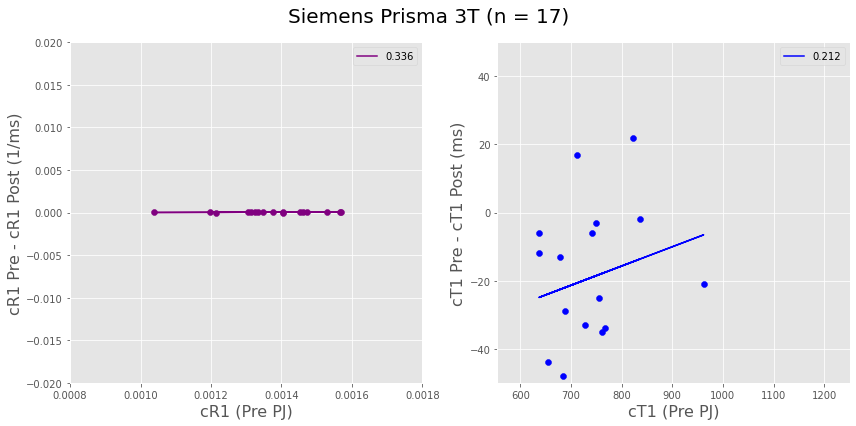

In [45]:
# Delta cR1 against native cR1
plt.style.use('ggplot')
PA['delta cR1'] = PA["cR1 median (Pre PJ)"]- PA["cR1 median (Post PJ)"]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

axes[0].scatter(PA["cR1 median (Pre PJ)"], PA['delta cR1'], color = 'purple')
m, b = np.polyfit(PA["cR1 median (Pre PJ)"], PA['delta cR1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(PA["cR1 median (Pre PJ)"], PA['delta cR1'])
axes[0].plot(PA["cR1 median (Pre PJ)"], m*PA["cR1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)) , color = 'purple')
axes[0].legend(loc = 'best')
axes[0].set_xlabel('cR1 (Pre PJ)',  fontsize = 16)
axes[0].set_ylabel("cR1 Pre - cR1 Post (1/ms)", fontsize = 16)
axes[0].set_xlim(0.0008,0.0018)
axes[0].set_ylim(-0.02,0.02)

# Delta cT1 against native cT1
PA['delta cT1'] = PA["cT1 median (Pre PJ)"]- PA["cT1 median (Post PJ)"]

axes[1].scatter(PA["cT1 median (Pre PJ)"], PA['delta cT1'], color = 'blue')
m, b = np.polyfit(PA["cT1 median (Pre PJ)"], PA['delta cT1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(PA["cT1 median (Pre PJ)"], PA['delta cT1'])
axes[1].plot(PA["cT1 median (Pre PJ)"], m*PA["cT1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)), color = 'blue')
axes[1].legend(loc = 'best')
axes[1].set_xlabel('cT1 (Pre PJ)',  fontsize = 16)
axes[1].set_ylabel("cT1 Pre - cT1 Post (ms)", fontsize = 16)
axes[1].set_xlim(555,1250)
axes[1].set_ylim(-50,50)

plt.tight_layout()
print('Both delta cR1 and delta cT1 had poor corelation coefficients against their initial value under 3T')

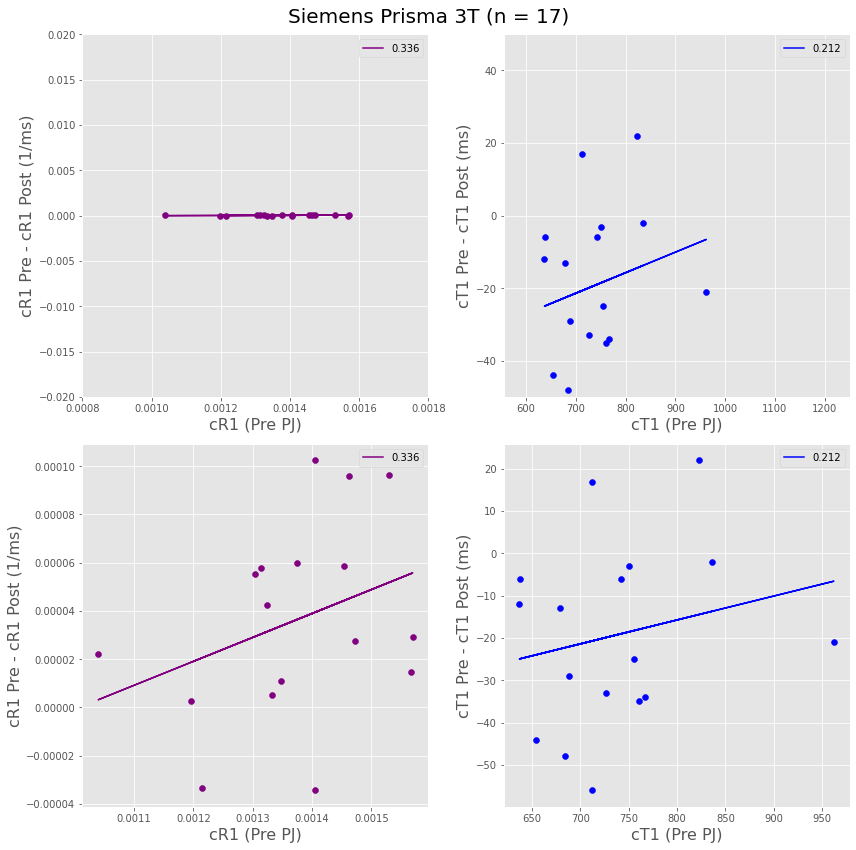

In [46]:
# Delta cR1 against native cR1
plt.style.use('ggplot')
PA['delta cR1'] = PA["cR1 median (Pre PJ)"]- PA["cR1 median (Post PJ)"]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

m, b = np.polyfit(PA["cR1 median (Pre PJ)"], PA['delta cR1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(PA["cR1 median (Pre PJ)"], PA['delta cR1'])
axes[0, 0].scatter(PA["cR1 median (Pre PJ)"], PA['delta cR1'], color = 'purple')
axes[0, 0].plot(PA["cR1 median (Pre PJ)"], m*PA["cR1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)) , color = 'purple')
axes[0, 0].legend(loc = 'best')
axes[0, 0].set_xlabel('cR1 (Pre PJ)',  fontsize = 16)
axes[0, 0].set_ylabel("cR1 Pre - cR1 Post (1/ms)", fontsize = 16)
axes[0, 0].set_xlim(0.0008,0.0018)
axes[0, 0].set_ylim(-0.02,0.02)

# Delta cT1 against native cT1
PA['delta cT1'] = PA["cT1 median (Pre PJ)"]- PA["cT1 median (Post PJ)"]

m, b = np.polyfit(PA["cT1 median (Pre PJ)"], PA['delta cT1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(PA["cT1 median (Pre PJ)"], PA['delta cT1'])
axes[0, 1].scatter(PA["cT1 median (Pre PJ)"], PA['delta cT1'], color = 'blue')
axes[0, 1].plot(PA["cT1 median (Pre PJ)"], m*PA["cT1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)), color = 'blue')
axes[0, 1].legend(loc = 'best')
axes[0, 1].set_xlabel('cT1 (Pre PJ)',  fontsize = 16)
axes[0, 1].set_ylabel("cT1 Pre - cT1 Post (ms)", fontsize = 16)
axes[0, 1].set_xlim(555,1250)
axes[0, 1].set_ylim(-50,50)


m, b = np.polyfit(PA["cR1 median (Pre PJ)"], PA['delta cR1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(PA["cR1 median (Pre PJ)"], PA['delta cR1'])
axes[1, 0].scatter(PA["cR1 median (Pre PJ)"], PA['delta cR1'], color = 'purple')
axes[1, 0].plot(PA["cR1 median (Pre PJ)"], m*PA["cR1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)) , color = 'purple')
axes[1, 0].legend(loc = 'best')
axes[1, 0].set_xlabel('cR1 (Pre PJ)',  fontsize = 16)
axes[1, 0].set_ylabel("cR1 Pre - cR1 Post (1/ms)", fontsize = 16)


# Delta cT1 against native cT1
PA['delta cT1'] = PA["cT1 median (Pre PJ)"]- PA["cT1 median (Post PJ)"]

m, b = np.polyfit(PA["cT1 median (Pre PJ)"], PA['delta cT1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(PA["cT1 median (Pre PJ)"], PA['delta cT1'])
axes[1, 1].scatter(PA["cT1 median (Pre PJ)"], PA['delta cT1'], color = 'blue')
axes[1, 1].plot(PA["cT1 median (Pre PJ)"], m*PA["cT1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)), color = 'blue')
axes[1, 1].legend(loc = 'best')
axes[1, 1].set_xlabel('cT1 (Pre PJ)',  fontsize = 16)
axes[1, 1].set_ylabel("cT1 Pre - cT1 Post (ms)", fontsize = 16)

plt.tight_layout()

Both delta cR1 and delta cT1 had poor corelation coefficients against their initial value under 1.5T


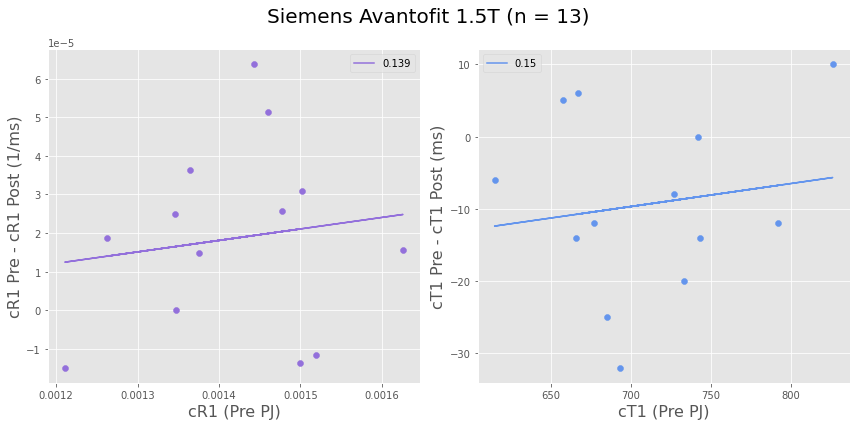

In [47]:
# Delta cR1 against native cR1 for 1.5T
plt.style.use('ggplot')
AV['delta cR1'] = AV["cR1 median (Pre PJ)"]- AV["cR1 median (Post PJ)"]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

axes[0].scatter(AV["cR1 median (Pre PJ)"], AV['delta cR1'], color = 'mediumpurple')
m, b = np.polyfit(AV["cR1 median (Pre PJ)"], AV['delta cR1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(AV["cR1 median (Pre PJ)"], AV['delta cR1'])
axes[0].plot(AV["cR1 median (Pre PJ)"], m*AV["cR1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)) , color = 'mediumpurple')
axes[0].legend(loc = 'best')
axes[0].set_xlabel('cR1 (Pre PJ)',  fontsize = 16)
axes[0].set_ylabel("cR1 Pre - cR1 Post (1/ms)", fontsize = 16)

# Delta cT1 against native cT1
AV['delta cT1'] = AV["cT1 median (Pre PJ)"]- AV["cT1 median (Post PJ)"]

axes[1].scatter(AV["cT1 median (Pre PJ)"], AV['delta cT1'], color = 'cornflowerblue')
m, b = np.polyfit(AV["cT1 median (Pre PJ)"], AV['delta cT1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(AV["cT1 median (Pre PJ)"], AV['delta cT1'])
axes[1].plot(AV["cT1 median (Pre PJ)"], m*AV["cT1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)), color = 'cornflowerblue')
axes[1].legend(loc = 'best')
axes[1].set_xlabel('cT1 (Pre PJ)',  fontsize = 16)
axes[1].set_ylabel("cT1 Pre - cT1 Post (ms)", fontsize = 16)
plt.tight_layout()
print('Both delta cR1 and delta cT1 had poor corelation coefficients against their initial value under 1.5T')

Both delta cR1 and delta cT1 had poor corelation coefficients against their initial value under 1.5T


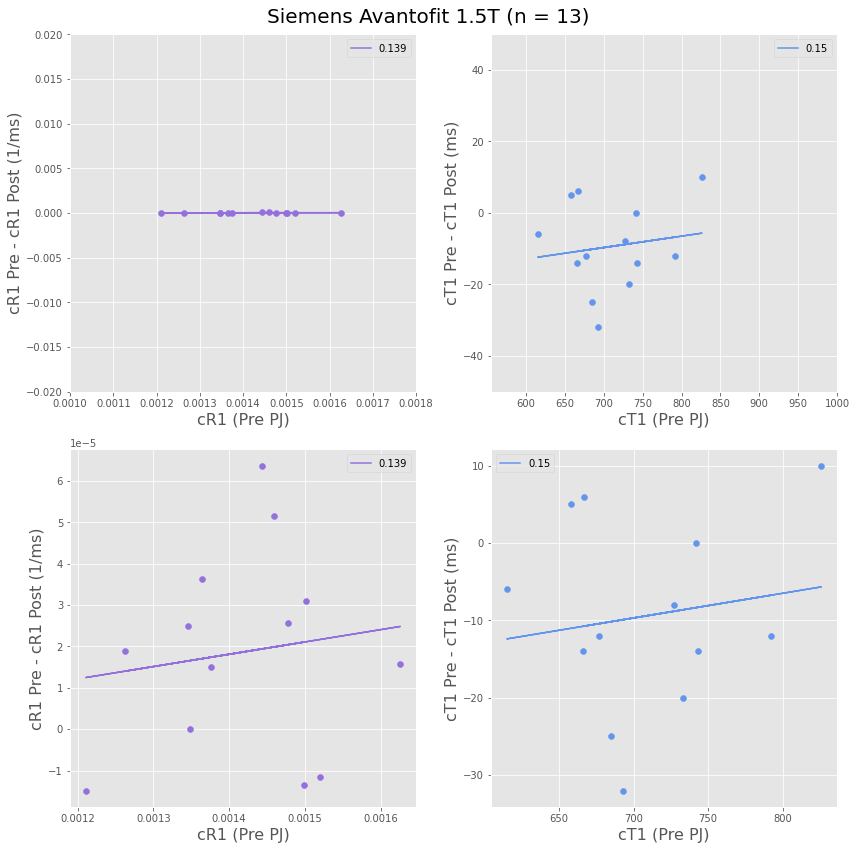

In [48]:
# Delta cR1 against native cR1 for 1.5T
plt.style.use('ggplot')
AV['delta cR1'] = AV["cR1 median (Pre PJ)"]- AV["cR1 median (Post PJ)"]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

m, b = np.polyfit(AV["cR1 median (Pre PJ)"], AV['delta cR1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(AV["cR1 median (Pre PJ)"], AV['delta cR1'])
axes[0, 0].scatter(AV["cR1 median (Pre PJ)"], AV['delta cR1'], color = 'mediumpurple')
axes[0, 0].plot(AV["cR1 median (Pre PJ)"], m*AV["cR1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)) , color = 'mediumpurple')
axes[0, 0].legend(loc = 'best')
axes[0, 0].set_xlabel('cR1 (Pre PJ)',  fontsize = 16)
axes[0, 0].set_ylabel("cR1 Pre - cR1 Post (1/ms)", fontsize = 16)
axes[0, 0].set_xlim(0.0010,0.0018)
axes[0, 0].set_ylim(-0.02,0.02)


# Delta cT1 against native cT1
AV['delta cT1'] = AV["cT1 median (Pre PJ)"]- AV["cT1 median (Post PJ)"]

m, b = np.polyfit(AV["cT1 median (Pre PJ)"], AV['delta cT1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(AV["cT1 median (Pre PJ)"], AV['delta cT1'])
axes[0, 1].scatter(AV["cT1 median (Pre PJ)"], AV['delta cT1'], color = 'cornflowerblue')
axes[0, 1].plot(AV["cT1 median (Pre PJ)"], m*AV["cT1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)), color = 'cornflowerblue')
axes[0, 1].legend(loc = 'best')
axes[0, 1].set_xlabel('cT1 (Pre PJ)',  fontsize = 16)
axes[0, 1].set_ylabel("cT1 Pre - cT1 Post (ms)", fontsize = 16)
axes[0, 1].set_xlim(555,1000)
axes[0, 1].set_ylim(-50,50)


m, b = np.polyfit(AV["cR1 median (Pre PJ)"], AV['delta cR1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(AV["cR1 median (Pre PJ)"], AV['delta cR1'])
axes[1, 0].scatter(AV["cR1 median (Pre PJ)"], AV['delta cR1'], color = 'mediumpurple')
axes[1, 0].plot(AV["cR1 median (Pre PJ)"], m*AV["cR1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)) , color = 'mediumpurple')
axes[1, 0].legend(loc = 'best')
axes[1, 0].set_xlabel('cR1 (Pre PJ)',  fontsize = 16)
axes[1, 0].set_ylabel("cR1 Pre - cR1 Post (1/ms)", fontsize = 16)



# Delta cT1 against native cT1
AV['delta cT1'] = AV["cT1 median (Pre PJ)"]- AV["cT1 median (Post PJ)"]

m, b = np.polyfit(AV["cT1 median (Pre PJ)"], AV['delta cT1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(AV["cT1 median (Pre PJ)"], AV['delta cT1'])
axes[1, 1].scatter(AV["cT1 median (Pre PJ)"], AV['delta cT1'], color = 'cornflowerblue')
axes[1, 1].plot(AV["cT1 median (Pre PJ)"], m*AV["cT1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)), color = 'cornflowerblue')
axes[1, 1].legend(loc = 'best')
axes[1, 1].set_xlabel('cT1 (Pre PJ)',  fontsize = 16)
axes[1, 1].set_ylabel("cT1 Pre - cT1 Post (ms)", fontsize = 16)
plt.tight_layout()
print('Both delta cR1 and delta cT1 had poor corelation coefficients against their initial value under 1.5T')

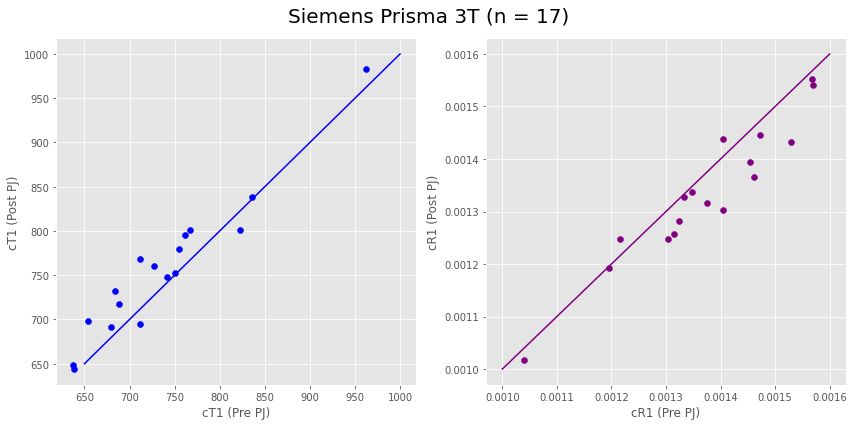

In [49]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)
ax[0].scatter(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"], color = 'blue')
ax[0].plot( [650,1000], [650,1000] , color = 'blue')
ax[0].set_xlabel('cT1 (Pre PJ)')
ax[0].set_ylabel('cT1 (Post PJ)')


ax[1].scatter(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"], color = 'purple')
ax[1].plot( [0.0010, 0.0016], [0.0010, 0.0016] , color = 'purple')
ax[1].set_xlabel('cR1 (Pre PJ)')
ax[1].set_ylabel('cR1 (Post PJ)')

plt.tight_layout()

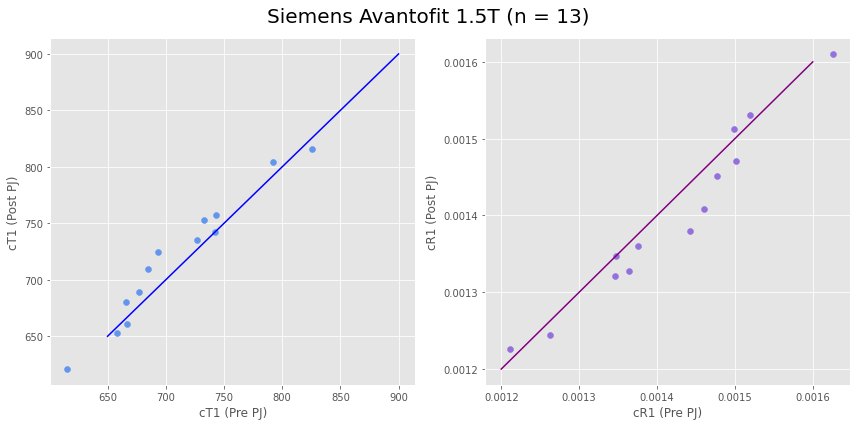

In [50]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)
ax[0].scatter(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"], color = 'cornflowerblue')
ax[0].plot( [650,900], [650,900] , color = 'blue')
ax[0].set_xlabel('cT1 (Pre PJ)')
ax[0].set_ylabel('cT1 (Post PJ)')


ax[1].scatter(AV["cR1 median (Pre PJ)"], AV["cR1 median (Post PJ)"], color = 'mediumpurple')
ax[1].plot( [0.0012, 0.0016], [0.0012, 0.0016] , color = 'purple')
ax[1].set_xlabel('cR1 (Pre PJ)')
ax[1].set_ylabel('cR1 (Post PJ)')

plt.tight_layout()

Text(0, 0.5, 'cT1 Pre - cT1 Post')

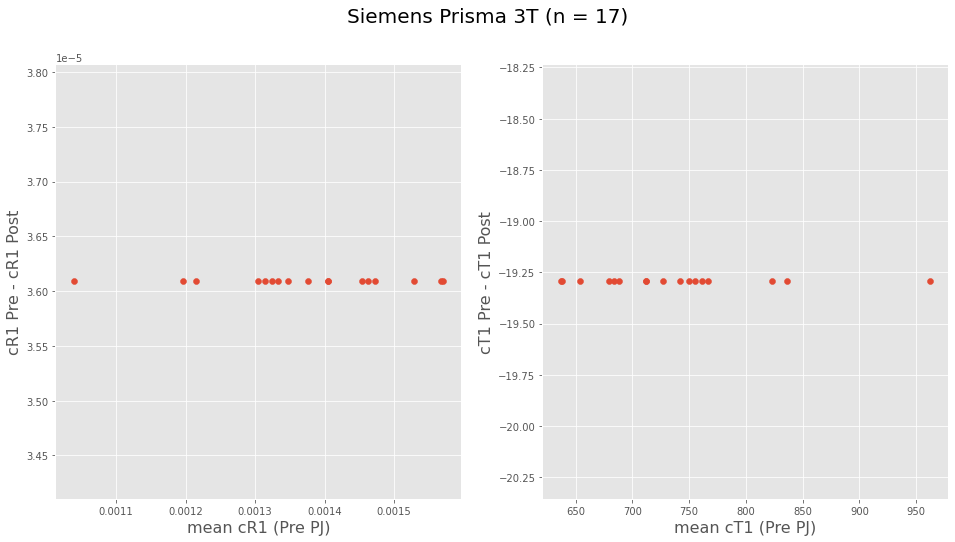

In [51]:
# TODO: ask Emma the better graph to improve
# Delta R1 against native R1
PA['delta cR1'] = PA["cR1 median (Pre PJ)"]- PA["cR1 median (Post PJ)"]
PA['delta cT1'] = PA["cT1 median (Pre PJ)"]- PA["cT1 median (Post PJ)"]
PA['meandiff_cR1'] = np.mean(PA['delta cR1'])
PA['meandiff_cT1'] = np.mean(PA['delta cT1'])

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

axes[0].scatter(PA["cR1 median (Pre PJ)"], PA['meandiff_cR1'])
axes[0].set_xlabel('mean cR1 (Pre PJ)',  fontsize = 16)
axes[0].set_ylabel("cR1 Pre - cR1 Post", fontsize = 16)

axes[1].scatter(PA["cT1 median (Pre PJ)"], PA['meandiff_cT1'])
axes[1].set_xlabel('mean cT1 (Pre PJ)',  fontsize = 16)
axes[1].set_ylabel("cT1 Pre - cT1 Post", fontsize = 16)

Text(0, 0.5, 'cT1 Pre - cT1 Post')

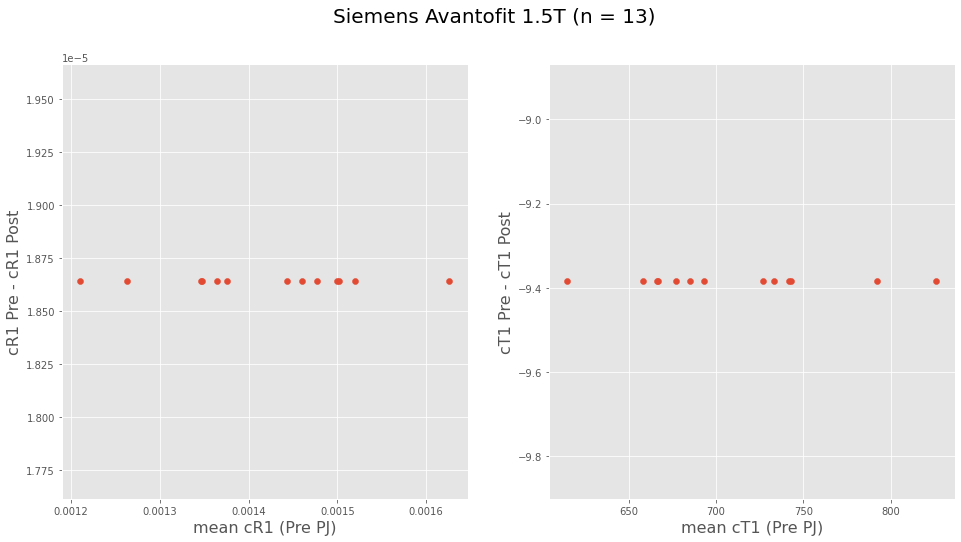

In [52]:
# TODO: ask Emma the better graph to improve
# Delta R1 against native R1
AV['delta cR1'] = AV["cR1 median (Pre PJ)"]- AV["cR1 median (Post PJ)"]
AV['delta cT1'] = AV["cT1 median (Pre PJ)"]- AV["cT1 median (Post PJ)"]
AV['meandiff_cR1'] = np.mean(AV['delta cR1'])
AV['meandiff_cT1'] = np.mean(AV['delta cT1'])

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

axes[0].scatter(AV["cR1 median (Pre PJ)"], AV['meandiff_cR1'])
axes[0].set_xlabel('mean cR1 (Pre PJ)',  fontsize = 16)
axes[0].set_ylabel("cR1 Pre - cR1 Post", fontsize = 16)

axes[1].scatter(AV["cT1 median (Pre PJ)"], AV['meandiff_cT1'])
axes[1].set_xlabel('mean cT1 (Pre PJ)',  fontsize = 16)
axes[1].set_ylabel("cT1 Pre - cT1 Post", fontsize = 16)

# Discussion

### The sample size is too small
Even though our analysis showed no statistical significant differences were found in the PDFF and iron metrics for both field strength dat; the differences presented in cT1 and cR1 data were smaller than measurement variation compared to repeatability experiment.
There were less than 20 subjects for each arm of field strength. It is also difficult to conduct TOAST test to define effective size of participant to collect because, to perform TOAST test, a sound experience with the question of interest is needed to decide the alpha value to pass the TOAST test.

### Non control of quantification

The conclusion of changes found in pineapple juice dataset is smaller than the measurement variation can be questionable

Acquisition of the dataset although for both repeatability and pineapple juice experiment were acquired roughly around the same time. The inter-operator variation was not controlled. The analysis/quantification of the metrics, in repeatability experiment was done by a set of trained analysts in a blinded manner with the device LMSv3. However, the pineapple juice experiment metrics quantification was done by automatic segmentation and quantification algorithm developed to be used in LMSv5.


### Inhomogeneous participant 
Retrospectively, the design of the study aimed to included a wide range of health status. However, the subgroup (pulling a set of participant for pineapple juice experiment) lead to a very small sample size. With outliers presented in the pineapple juice experiment dataset, the disease status drastically skew the distribution of measured metrics and therefore makes it difficult to draw solid conclusion.


# Playgorund

In [ ]:
# TODO: Make narrative summary about the population descriptive statistics about IQR and Reference value

In [ ]:
# TODO:
PA.describe(include=['datetime']) 
# No datetime data are in this experiment but it will be good to see changes in metric across time

In [53]:
tmp = drop_row.drop(columns = ['cT1 Q1 (Pre PJ)', 'cT1 Q3 (Pre PJ)', 'Iron Q1 (Pre PJ)',
       'Iron Q3 (Pre PJ)', 'PDFF Q1 (Pre PJ)', 'PDFF Q3 (Pre PJ)', 'cT1 Q1 (Post PJ)',
       'cT1 Q3 (Post PJ)', 'Iron Q1 (Post PJ)', 'Iron Q3 (Post PJ)',
       'PDFF Q1 (Post PJ)', 'PDFF Q3 (Post PJ)', 'Record Id'])

In [54]:
tmp

,Portal_ID (Pre PJ),EXP_number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y,vendor_model (Post PJ),field_strength (Post PJ)
0,11947,EXP010vhobplp,654.0,1.1,4.9,SIEMENSPrisma,3T,9827,EXP010kfnnfem,698.0,1.2,4.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
1,9625,EXP010vetygxw,667.0,1.1,6.1,SIEMENSAvanto_ﬁt,.5T,9623,EXP010nzjwutv,661.0,1.0,5.5,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
2,9834,EXP010vkcrjqc,836.0,1.0,1.9,SIEMENSPrisma,3T,9830,EXP010ooxyfwn,838.0,0.8,1.9,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
3,9818,EXP010vpitawu,826.0,1.0,1.2,SIEMENSAvanto_ﬁt,.5T,9816,EXP010otlxkrz,816.0,1.0,1.6,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
4,9843,EXP010vuvdody,638.0,1.1,3.6,SIEMENSPrisma,3T,9840,EXP010ochlmjx,644.0,1.1,2.6,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
5,9820,EXP010woaclvx,658.0,1.1,1.3,SIEMENSAvanto_ﬁt,.5T,9814,EXP010ogwfklv,653.0,1.1,1.3,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
6,9618,EXP010wktzdls,823.0,0.9,1.6,SIEMENSPrisma,3T,9616,EXP010olbctkw,801.0,0.8,2.1,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
7,9819,EXP010waxoiey,615.0,1.3,1.7,SIEMENSAvanto_ﬁt,.5T,9815,EXP010opqcxxj,621.0,1.4,1.6,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
8,9962,EXP010wlnocav,962.0,1.3,21.0,SIEMENSPrisma,3T,9958,EXP010oyklrkq,983.0,1.4,21.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
9,9973,EXP010wrtonqh,688.0,1.0,3.4,SIEMENSPrisma,3T,9971,EXP010pzugyag,717.0,1.0,2.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T


In [55]:
tmp.mask(tmp['cT1 median (Pre PJ)']> tmp['cT1_Ref_Upper_y'], 3)

,Portal_ID (Pre PJ),EXP_number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),vendor_model (Pre PJ),field_strength (Pre PJ),Portal_ID (Post PJ),EXP_number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y,vendor_model (Post PJ),field_strength (Post PJ)
0,3,3,3.0,3.0,3.0,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3
1,3,3,3.0,3.0,3.0,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3
2,3,3,3.0,3.0,3.0,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3
3,3,3,3.0,3.0,3.0,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3
4,3,3,3.0,3.0,3.0,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3
5,3,3,3.0,3.0,3.0,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3
6,3,3,3.0,3.0,3.0,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3
7,9819,EXP010waxoiey,615.0,1.3,1.7,SIEMENSAvanto_ﬁt,.5T,9815,EXP010opqcxxj,621.0,1.4,1.6,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
8,3,3,3.0,3.0,3.0,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3
9,3,3,3.0,3.0,3.0,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3


In [56]:
dfs = np.split(drop_row, [14], axis = 1)

In [57]:
dfs[1]

,Portal_ID (Post PJ),EXP_number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y,vendor_model (Post PJ),field_strength (Post PJ)
0,9827,EXP010kfnnfem,698.0,1.2,4.8,668.0,735.0,1.1,1.2,3.8,5.9,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
1,9623,EXP010nzjwutv,661.0,1.0,5.5,640.0,696.0,1.0,1.1,4.1,7.0,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
2,9830,EXP010ooxyfwn,838.0,0.8,1.9,810.0,881.0,0.8,0.8,1.1,2.7,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
3,9816,EXP010otlxkrz,816.0,1.0,1.6,786.0,867.0,0.9,1.0,0.4,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
4,9840,EXP010ochlmjx,644.0,1.1,2.6,616.0,678.0,1.1,1.2,1.6,3.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
5,9814,EXP010ogwfklv,653.0,1.1,1.3,632.0,688.0,1.0,1.1,0.0,2.7,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
6,9616,EXP010olbctkw,801.0,0.8,2.1,764.0,842.0,0.8,0.9,1.3,3.1,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
7,9815,EXP010opqcxxj,621.0,1.4,1.6,600.0,656.0,1.3,1.5,0.0,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
8,9958,EXP010oyklrkq,983.0,1.4,21.0,917.0,104.0,1.3,1.4,19.0,-22.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
9,9971,EXP010pzugyag,717.0,1.0,2.0,692.0,749.0,1.0,1.0,0.9,3.3,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
